# Proyek Analisis Data: [E-Commerce Public Dataset]

- Nama: [KASWITA
- Email: [kaswita18@gmail.com]
- ID Dicoding: [the_first_lady]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apa yang paling banyak dan paling sedikit terjual ?
- Pertanyaan 2 : Berapa banyak revenue yang didapat dalam 6 bulan terakhir dan sepanjang periode ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering data

**1. Memuat tabel orders**

In [2]:
orders_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight :**
- **orders_dataset:**
  - Waktu Pengiriman: Menilai waktu pengiriman rata-rata dari pesanan yang diterima hingga pesanan dikirimkan ke pelanggan.
  - Status Pesanan: Menganalisis status pesanan untuk memahami tingkat penyelesaian dan masalah yang mungkin terjadi.

**2. Memuat tabel produk**

In [3]:
produk_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_products_dataset.csv")
produk_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight :**
- **products_dataset:**
  - Kategori Produk: Mengidentifikasi kategori produk yang paling populer dan yang paling tidak populer.

**3. Memuat tabel seller**

In [4]:
seller_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight :**
- **sellers_dataset:**
  - Distribusi Penjual: Menilai distribusi geografis penjual dan kontribusi mereka terhadap penjualan total.
  - Kinerja Penjual: Menganalisis kinerja penjual berdasarkan jumlah penjualan dan ulasan pelanggan.

**4. Memuat tabel kategori_produk**

In [5]:
kategori_produk_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/product_category_name_translation.csv")
kategori_produk_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight :**
- **product_category_name_translation_dataset :**
  - Kategori Produk: Menghubungkan nama kategori produk dalam bahasa asli dengan terjemahannya untuk analisis lebih lanjut.
  - Analisis Kategori: Mengidentifikasi kategori produk yang paling banyak terjual dan kontribusi mereka terhadap pendapatan total.
  

**5. Memuat tabel order_item**

In [6]:
order_item_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight :**
- **order_items_dataset:**
  - Produk Terlaris: Mengidentifikasi produk yang paling banyak terjual dan kontribusi mereka terhadap pendapatan total.
  - Kinerja Penjual: Menilai performa penjual berdasarkan jumlah penjualan dan ulasan pelanggan.

**6. Memuat tabel payment**

In [7]:
payment_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight :**
- **payments_dataset:**
  - Metode Pembayaran: Menilai metode pembayaran yang paling sering digunakan oleh pelanggan.
  - Nilai Transaksi: Menganalisis nilai transaksi rata-rata dan total untuk memahami perilaku pembelian pelanggan.

**7. Memuat tabel review**

In [8]:
review_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight :**
- **reviews_dataset:**
  - Kepuasan Pelanggan: Menilai ulasan pelanggan untuk memahami tingkat kepuasan.

**8. Memuat tabel geolokasi**

In [9]:
geolokasi_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_geolocation_dataset.csv")
geolokasi_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight :**
- **geolocation_dataset :**
  - Lokasi Pengiriman: Menghubungkan kode pos dengan koordinat geografis untuk analisis lebih lanjut tentang waktu dan biaya pengiriman.

**9. Memuat tabel customer**

In [10]:
customer_df = pd.read_csv("C:/Users/USER/Project_Python/Dicoding/proyek_analisis_data/E-Commerce Public Dataset/olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight :**
- **customers_dataset:**
  - Distribusi Pelanggan: Menilai distribusi geografis pelanggan berdasarkan kota dan negara    bagian. Ini dapat membantu dalam memahami area dengan permintaan tertinggi dan terendah.
  - Pelanggan Unik: Mengidentifikasi pelanggan yang melakukan pembelian berulang di toko.

### Assessing data

**1. Menilai data orders_df**

**1.1. memeriksa tipe data dan missing value**

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight :**

- Terdapat kesalahan tipe data di kolom :

      - order_purchase_timestamp
      - order_approved_at
      - order_delivered_carrier_date
      - order_delivered_customer_date
      - order_estimated_delivery_date.
  
  kolom-kolom tersebut harusnya direpresentasikan sebagai tipe data datetime.
  
- Terdapat juga sedikit perbedaan pada jumlah data pada kolom :
  
      - order_approved_at   
      - order_delivered_carrier_date
      - order_delivered_customer_date.
  
  Hal ini menunjukkan adanya missing values pada kedua kolom tersebut.

**1.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight :**

terdapat jumlah missing value yang cukup banyak. untuk menganalisa lebih lanjut, kita dapat memeriksa lebih lanjut melalui kolom order_status

**1.3. memeriksa duplikasi data**

In [13]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Ini menunjukkan tidak terdapat duplikasi pada orders_df.

**1.4. memeriksa parameter statistik dari kolom numerik**

In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight :**

Ini menunjukkan tidak terdapat keanehan nilai pada orders_df.

**2. Menilai data produk_df**

**2.1. memeriksa tipe data dan missing value**

In [15]:
produk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight :**

- Terdapat missing values pada hampir semua kolom kecuali kolom product_id.

**2.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [16]:
produk_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight :**

terdapat jumlah missing value yang cukup banyak pada sebagian kolom. untuk menganalisa lebih lanjut, kita dapat memeriksa melalui kolom product_category_name.

**2.3. memeriksa duplikasi data**

In [17]:
print("Jumlah duplikasi: ",produk_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Ini menunjukkan tidak terdapat duplikasi data pada produk_df.

**2.4. memeriksa parameter statistik dari kolom numerik**

In [18]:
produk_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight :**

Ini menunjukkan tidak terdapat keanehan nilai pada produk_df.

**3. Menilai data seller_df**

**3.1. memeriksa tipe data dan missing value**

In [19]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight :**

Ini menunjukkan tidak terdapat kesalahan tipe data maupun missing value pada seller_df.

**3.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [20]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**3.3. memeriksa duplikasi data**

In [21]:
print("Jumlah duplikasi: ",seller_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Ini menunjukkan tidak terdapat duplikasi data pada seller_df.

**3.4. memeriksa parameter statistik dari kolom numerik**

In [22]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight :**

Ini menunjukkan tidak terdapat keanehan nilai pada seller_df.

**4. Menilai data kategori_produk_df**

**4.1. memeriksa tipe data dan missing value**

In [23]:
kategori_produk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight :**

Ini menunjukkan tidak terdapat kesalahan tipe data maupun missing value pada kategori_produk_df.

**4.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [24]:
kategori_produk_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**4.3. memeriksa duplikasi data**

In [25]:
print("Jumlah duplikasi: ",kategori_produk_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Ini menunjukkan tidak terdapat duplikasi data pada kategori_produk_df.

**4.4. memeriksa parameter statistik dari kolom numerik**

In [26]:
kategori_produk_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight :**

Ini menunjukkan tidak terdapat keanehan nilai pada kategori_produk_df.

**5. Menilai data order_item_df**

**5.1. memeriksa tipe data dan missing value**

In [27]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight :**

- Terdapat kesalahan tipe data di kolom shipping_limit_date, kolom tersebut harusnya direpresentasikan sebagai tipe data datetime.
- Tidak terdapat missing value pada data payment_df

**5.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [28]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**5.3. menampilkan duplikasi data**

In [29]:
print("Jumlah duplikasi: ",order_item_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Tidak terdapat duplikasi data pada order_item_df.

**5.4. memeriksa parameter statistik dari kolom numerik**

In [30]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight :**

Tidak terdapat keanehan nilai pada order_item_df.

**6. Menilai data payment_df**

**6.1. memeriksa tipe data dan missing value**

In [31]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight :**

- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value pada data payment_df

**6.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [32]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**6.3. menampilkan duplikasi data**

In [33]:
print("Jumlah duplikasi: ",payment_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Tidak terdapat duplikasi data pada payment_df.

**6.4. memeriksa parameter statistik dari kolom numerik**

In [34]:
payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight :**

Tidak terdapat keanehan nilai pada payment_df.

**7. Menilai data review_df**

**7.1. memeriksa tipe data dan missing value**

In [35]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight :**

- Terdapat kesalahan tipe data pada kolom :
    - review_creation_date
    - review_answer_timestamp

- Terdapat missing value pada kolom :
    - review_comment_title
    - review_comment_message

**7.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [36]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight :**

terdapat jumlah missing value yang cukup banyak pada kolom review_comment_title dan review_comment_message. untuk menganalisa lebih lanjut, kita dapat memeriksa melalui kolom review_score.

**7.3. menampilkan duplikasi data**

In [37]:
print("Jumlah duplikasi: ",review_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Tidak terdapat duplikasi data pada review_df.

**7.4. memeriksa parameter statistik dari kolom numerik**

In [38]:
review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight :**

Tidak terdapat keanehan nilai pada review_df.

**8. Menilai data geolokasi_df**

**8.1. memeriksa tipe data dan missing value**

In [39]:
geolokasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight :**

- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value.

**8.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [40]:
geolokasi_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**8.3. menampilkan duplikasi data**

In [41]:
print("Jumlah duplikasi: ",geolokasi_df.duplicated().sum())

Jumlah duplikasi:  261831


**Insight :**

terdapat duplikasi data yang cukup banyak, akan dibersihkan pada tahap cleansing data.

**8.4. memeriksa parameter statistik dari kolom numerik**

In [42]:
geolokasi_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight :**

Tidak terdapat keanehan nilai pada geolokasi_df.

**9. Menilai data customer_df**

**9.1. memeriksa tipe data dan missing value**

In [43]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight :**

- Tidak terdapat kesalahan tipe data.
- Tidak terdapat missing value.

**9.2. menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom**

In [44]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**9.3. menampilkan duplikasi data**

In [45]:
print("Jumlah duplikasi: ",customer_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight :**

Tidak terdapat duplikasi data pada customer_df.

**9.4. memeriksa parameter statistik dari kolom numerik**

In [46]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight :**

Tidak terdapat keanehan nilai pada customer_df.

**Berikut rangkumannya pada tahap assessing data :**
1. orders_df
    - Tipe data :
      - order_purchase_timestamp
      - order_approved_at 
      - order_delivered_carrier_date 
      - order_delivered_customer_date 
      - order_estimated_delivery_date.
    - Missing value :
      - order_approved_at = 160
      - order_delivered_carrier_date = 1783
      - order_delivered_customer_date = 2965
    - Duplikat data : -
    - Inaccurate value : -
2. produk_df
    - Tipe data : -
    - Missing value :
      - product_category_name         = 610
      - product_name_lenght           = 610
      - product_description_lenght    = 610
      - product_photos_qty            = 610
      - product_weight_g              = 2
      - product_length_cm             = 2  
      - product_height_cm             = 2  
      - product_width_cm              = 2
    - Duplikat data : -
    - Inaccurate value : -
3. seller_df
    - Tipe data : -
    - Missing Value : -
    - Duplikat data : -
    - Inaccurate value : -
4. kategori_produk_df
    - Tipe data : -
    - Missing Value : -
    - Duplikat data : -
    - Inaccurate value : -
5. order_item_df
    - Tipe data :
        - shipping_limit_date
    - Missing value : -
    - Duplikat data : -
    - Inaccurate value : -
6. payment_df
    - Tipe data : -
    - Missing Value : -
    - Duplikat data : -
    - Inaccurate value : -
7. review_df
    - Tipe data :
       - review_creation_date  
       - review_answer_timestamp
    - Missing value :
       - review_comment_title   
       - review_comment_message
    - Duplikat data : -
    - Inaccurate value : -
8. geolokasi_df
    - Tipe data : -
    - Missing value : -
    - Duplikat data : 261831
    - Inaccurate value : -
9. customer_df
    - Tipe data : -
    - Missing Value : -
    - Duplikat data : -
    - Inaccurate value : -

### Cleaning data

**1. Membersihkan data orders_df**

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat dua masalah yang dijumpai dalam orders_df, yaitu tipe data, dan missing value.

**1.1. Menangani tipe data**

In [47]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

**1.2. Menangani missing value**

Kita bisa memfilter satu persatu dari ketiga kolom untuk dianalisa lebih lanjut sebelum menentukan metode yang tepat untuk menangani missing value pada ketiga kolom tersebut.

**1.2.1. Memfilter kolom "order_approved_at"**

In [48]:
orders_df[ orders_df.order_approved_at.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


**Insight :**

Berdasarkan tabel data di atas, dapat dilihat bahwa baris data tersebut mengandung banyak informasi penting. Sekilas kolom yang memiliki missing value sama-sama memiliki **"order_status = canceled"**.

**1.2.2. Memfilter kolom "order_delivered_carrier_date"**

In [49]:
orders_df[ orders_df.order_delivered_carrier_date.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


**Insight :**

Dari tabel data di atas, didapat informasi bahwa kolom **"order_status" terdiri dari beberapa status dan kolom "order_approved_at" ternyata sebagian baris memiliki value**.

**1.2.3. Memfilter kolom "order_delivered_customer_date"**

In [50]:
orders_df[ orders_df.order_delivered_customer_date.isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


**Insight :**

Jika kita membedah kolom "order_delivered_customer_date" didapat informasi bahwa kolom **"order_status" terdiri dari beberapa status, kolom "order_approved_at" sebagian barisnya memiliki value dan kolom "order_delivered_carrier_date" sebagian baris nya juga memiliki value**. 

dari hasil filtering pada ketiga kolom dapat disimpulkan bahwa semua baris data dan kolom memiliki informasi penting yang bisa digunakan untuk analisa lebih lanjut, sehingga tidak dapat dibuang/dihilangkan. oleh karena itu, kita bisa menggunakan **metode interpolation (teknik yang sering digunakan pada data time series, di mana missing values diisi dengan nilai yang diinterpolasi dari data sebelum dan sesudahnya.)**.

Untuk menentukan estimasi berdasarkan pola yang ada, kita bisa memfilter datanya nya berdasarkan kolom "order_status". namun sebelumnya kita harus mengidentifikasi terlebih dahulu kolom "order_status" untuk melihat apa saja value pada kolom tersebut.

In [51]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Insight :**

Berdasarkan hasil di atas, dapat diketahui bahwa kolom **"order_status"** terdiri dari beberapa value, mulai dari **"approved"** hingga **"delivered"**. mari kita filter satu-satu berdasarkan value pada kolom tersebut.

**1.2.4. Memfilter kolom "'order_status" == approved**

In [52]:
approved_df = orders_df[orders_df['order_status'] == 'approved']
approved_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


**1.2.5. Memfilter kolom "'order_status" == created**

In [53]:
created_df = orders_df[orders_df['order_status'] == 'created']
created_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


**1.2.6. Memfilter kolom "'order_status" == processing**

In [54]:
processing_df = orders_df[orders_df['order_status'] == 'processing']
processing_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04


**1.2.7. Memfilter kolom "'order_status" == invoiced**

In [55]:
invoiced_df = orders_df[orders_df['order_status'] == 'invoiced']
invoiced_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20


**1.2.8. Memfilter kolom "'order_status" == unavailable**

In [56]:
unavailable_df = orders_df[orders_df['order_status'] == 'unavailable']
unavailable_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27


**1.2.9. Memfilter kolom "'order_status" == canceled**

In [57]:
canceled_df = orders_df[orders_df['order_status'] == 'canceled']
canceled_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17


**1.2.10. Memfilter kolom "'order_status" == shipped**

In [58]:
shipped_df = orders_df[orders_df['order_status'] == 'shipped']
shipped_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03


**1.2.11. Memfilter kolom "'order_status" == delivered**

In [59]:
delivered_df = orders_df[orders_df['order_status'] == 'delivered']
delivered_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Insight :**

Berdasarkan hasil filtering pada kolom "order_status" di atas, dapat disimpulkan bahwa :
1. kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date **tidak semua barisnya memiliki missing value, beberapa memiliki value**.
2. dapat dilihat pada kolom waktu terkait seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date, kita bisa menganalisis selisih waktu rata-rata yang dibutuhkan untuk setiap tahap proses pesanan.

Contoh : 
untuk mengisi kolom "order_approved_at", kita bisa **menghitung selisih waktu rata-rata antara kolom "order_approved_at" yang tanpa nilai NaT dengan kolom "order_purchase_timestamp"**

**1.2.12. Menghitung nilai rata-rata dari selisih waktu untuk mengisi kolom "order_approved_at"**

In [60]:
# Filter data dengan kondisi tanpa nilai NaT
approve_time = orders_df[(orders_df['order_approved_at'].notna()) & 
                             (orders_df['order_purchase_timestamp'].notna())]

# Menghitung selisih waktu dalam menit
approve_time['time_difference_minutes'] = ((approve_time['order_approved_at'] - approve_time['order_purchase_timestamp']).dt.total_seconds() / 60).astype(int)

# Menampilkan hasil untuk memastikan perhitungan
print(approve_time[['order_purchase_timestamp', 'order_approved_at', 'time_difference_minutes']].head())


  order_purchase_timestamp   order_approved_at  time_difference_minutes
0      2017-10-02 10:56:33 2017-10-02 11:07:15                       10
1      2018-07-24 20:41:37 2018-07-26 03:24:27                     1842
2      2018-08-08 08:38:49 2018-08-08 08:55:23                       16
3      2017-11-18 19:28:06 2017-11-18 19:45:59                       17
4      2018-02-13 21:18:39 2018-02-13 22:20:29                       61


C:\Users\USER\AppData\Local\Temp\ipykernel_14476\765342664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approve_time['time_difference_minutes'] = ((approve_time['order_approved_at'] - approve_time['order_purchase_timestamp']).dt.total_seconds() / 60).astype(int)


**Insight :**

Setelah diketahui selisih waktunya, kita bisa mengambil nilai rata-rata dari selisih waktu yang dibutuhkan.

In [61]:
# Menghitung rata-rata dari time_difference_minutes 
average_time_difference_minutes = approve_time['time_difference_minutes'].mean()
# Mengubah rata-rata menjadi bilangan bulat 
average_time_difference_minutes_int = int(average_time_difference_minutes)
# Menampilkan hasil rata-rata 
print("Rata-rata selisih waktu (dalam menit):", average_time_difference_minutes_int)

Rata-rata selisih waktu (dalam menit): 624


In [62]:
orders_df['order_approved_at'] = orders_df.apply( 
    lambda row: row['order_purchase_timestamp'] + pd.Timedelta(minutes=average_time_difference_minutes_int) 
    if pd.isna(row['order_approved_at']) else row['order_approved_at'], axis=1 
)

**Insight :**

Secara keseluruhan, perintah ini bertujuan untuk mengisi missing values pada kolom "order_approved_at" dengan estimasi waktu persetujuan berdasarkan waktu pembelian (order_purchase_timestamp) ditambah dengan selisih waktu rata-rata. **Jika nilai pada kolom order_approved_at sudah ada, maka nilai tersebut tidak akan diubah**.

Jika proses pembersihan missing value pada kolom "order_approved_at" tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [63]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Cara yang sama bisa digunakan juga untuk mengisi missing value pada kolom "order_delivered_carrier_date". kita bisa menghitung selisih waktu rata-rata antara kolom "order_delivered_carrier_date" yang tanpa nilai NaT dengan kolom "order_approved_at".

**1.2.13. Menghitung nilai rata-rata dari selisih waktu untuk mengisi kolom "order_delivered_carrier_date"**

In [64]:
# Filter data dengan kondisi tanpa nilai NaT
carrier_time = orders_df[(orders_df['order_delivered_carrier_date'].notna()) & 
                             (orders_df['order_approved_at'].notna())]

# Menghitung selisih waktu dalam menit
carrier_time['time_difference_minutes'] = ((carrier_time['order_delivered_carrier_date'] - carrier_time['order_approved_at']).dt.total_seconds() / 60).astype(int)

# Menampilkan hasil untuk memastikan perhitungan
print(carrier_time[['order_approved_at', 'order_delivered_carrier_date', 'time_difference_minutes']].head())


    order_approved_at order_delivered_carrier_date  time_difference_minutes
0 2017-10-02 11:07:15          2017-10-04 19:55:00                     3407
1 2018-07-26 03:24:27          2018-07-26 14:31:00                      666
2 2018-08-08 08:55:23          2018-08-08 13:50:00                      294
3 2017-11-18 19:45:59          2017-11-22 13:39:59                     5394
4 2018-02-13 22:20:29          2018-02-14 19:46:34                     1286


C:\Users\USER\AppData\Local\Temp\ipykernel_14476\275069168.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_time['time_difference_minutes'] = ((carrier_time['order_delivered_carrier_date'] - carrier_time['order_approved_at']).dt.total_seconds() / 60).astype(int)


In [65]:
# Menghitung rata-rata dari time_difference_minutes 
average_time_difference_minutes = carrier_time['time_difference_minutes'].mean() 
average_time_difference_minutes_int = int(average_time_difference_minutes)
# Menampilkan hasil rata-rata 
print("Rata-rata selisih waktu (dalam menit):", average_time_difference_minutes_int)

Rata-rata selisih waktu (dalam menit): 4039


In [66]:
orders_df['order_delivered_carrier_date'] = orders_df.apply( 
    lambda row: row['order_approved_at'] + pd.Timedelta(minutes=average_time_difference_minutes_int) 
    if pd.isna(row['order_delivered_carrier_date']) else row['order_delivered_carrier_date'], axis=1 
)

Jika proses pembersihan missing value pada kolom "order_delivered_carrier_date" tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [67]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**1.2.14. Menghitung nilai rata-rata dari selisih waktu untuk mengisi kolom "order_delivered_customer_date"**

In [68]:
# Filter data dengan kondisi tanpa nilai NaT
customer_time = orders_df[(orders_df['order_delivered_customer_date'].notna()) & 
                             (orders_df['order_delivered_carrier_date'].notna())]

# Menghitung selisih waktu dalam menit
customer_time['time_difference_minutes'] = ((customer_time['order_delivered_customer_date'] - customer_time['order_delivered_carrier_date']).dt.total_seconds() / 60).astype(int)

# Menampilkan hasil untuk memastikan perhitungan
print(customer_time[['order_delivered_carrier_date', 'order_delivered_customer_date', 'time_difference_minutes']].head())

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

   time_difference_minutes  
0                     8730  
1                    17336  
2                    13216  
3                    13608  
4                     2790  


C:\Users\USER\AppData\Local\Temp\ipykernel_14476\147586525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_time['time_difference_minutes'] = ((customer_time['order_delivered_customer_date'] - customer_time['order_delivered_carrier_date']).dt.total_seconds() / 60).astype(int)


In [69]:
# Menghitung rata-rata dari time_difference_minutes 
average_time_difference_minutes = customer_time['time_difference_minutes'].mean() 
average_time_difference_minutes_int = int(average_time_difference_minutes)
# Menampilkan hasil rata-rata 
print("Rata-rata selisih waktu (dalam menit):", average_time_difference_minutes_int)

Rata-rata selisih waktu (dalam menit): 13436


In [70]:
orders_df['order_delivered_customer_date'] = orders_df.apply( 
    lambda row: row['order_delivered_carrier_date'] + pd.Timedelta(minutes=average_time_difference_minutes_int) 
    if pd.isna(row['order_delivered_customer_date']) else row['order_delivered_customer_date'], axis=1 
)

Jika proses pembersihan missing value pada kolom "order_delivered_customer_date" tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [71]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**2. Membersihkan data geolokasi_df**

Berdasarkan hasil proses assessing data, diketahui bahwa hanya terdapat satu masalah yang dijumpai dalam geolokasi_df, yaitu duplicate data.

**2.1. Menangani duplicate data**

In [72]:
geolokasi_df.drop_duplicates(inplace=True)

kode di atas akan menghasilkan keluaran seperti berikut “Jumlah duplikasi:  0”.

In [73]:
print("Jumlah duplikasi: ",geolokasi_df.duplicated().sum())

Jumlah duplikasi:  0


In [74]:
geolokasi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


**3. Membersihkan data order_item_df**

Berdasarkan hasil proses assessing data, diketahui bahwa hanya terdapat satu masalah yang dijumpai dalam order_item_df, yaitu tipe data.

**3.1. Menangani tipe data**

In [75]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_item_df[column] = pd.to_datetime(order_item_df[column])

In [76]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**4. Membersihkan data review_df**

Berdasarkan hasil proses assessing data, diketahui bahwa terdapat dua masalah yang dijumpai dalam review_df, yaitu tipe data, dan missing value.

**4.1. Menangani tipe data**

In [77]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
   review_df[column] = pd.to_datetime( review_df[column])

**4.2. Menangani missing value**

Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

**4.2.1. Memfilter kolom "review_comment_title"**

In [78]:
review_df[review_df.review_comment_title.isna()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


**Insight :**

dari hasil filtering dapat disimpulkan bahwa :
1. Banyak ulasan yang tidak memiliki judul (review_comment_title), tetapi tetap memiliki skor ulasan (review_score). Ini menunjukkan bahwa pelanggan mungkin merasa cukup puas atau tidak puas untuk memberikan skor, tetapi tidak merasa perlu untuk memberikan judul ulasan.
2. hal yang sama juga bisa berlaku untuk kolom "review_comment_message".

untuk lebih memastikan, bisa mengidentifikasi nilai-nilai yang terdapat pada kolom "review_comment_title" tersebut.

In [79]:
review_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

**Insight :**

dari data di atas dapat dilihat bahwa isi pada kolom "review_comment_title" cukup variatif. sehingga dapat dilakukan **metode menghapus kolom tersebut** dengan pertimbangan :
1. jika dilihat dari hasil analisa sebelumnya bahwa pelanggan **mungkin merasa cukup puas atau tidak puas untuk memberikan skor, tetapi tidak merasa perlu untuk memberikan judul ulasan**.
2. dapat menggunakan kolom "review_score" sebagai acuan untuk analisa lanjutan.

In [80]:
review_df = review_df.drop(columns=['review_comment_title'])

**4.2.2. Memfilter kolom "review_comment_message"**

In [81]:
review_df[review_df.review_comment_message.isna()].head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16,2017-07-18 19:30:34


untuk lebih memastikan, bisa mengidentifikasi nilai-nilai yang terdapat pada kolom "review_comment_message" tersebut.

In [82]:
review_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

**Insight :**

dari data di atas dapat dilihat bahwa isi pada kolom "review_comment_message" juga cukup variatif. sehingga dapat dilakukan **metode menghapus kolom tersebut** dengan pertimbangan :
1. jika dilihat dari hasil analisa sebelumnya bahwa pelanggan **mungkin merasa cukup puas atau tidak puas untuk memberikan skor, tetapi tidak merasa perlu untuk memberikan pesan ulasan**.
2. dapat menggunakan kolom "review_score" sebagai acuan untuk analisa lanjutan.

In [83]:
review_df = review_df.drop(columns=['review_comment_message'])

Jika proses pembersihan missing value pada kedua kolom tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [84]:
review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**5. Membersihkan data produk_df**

Berdasarkan hasil proses assessing data, diketahui bahwa hanya terdapat satu masalah yang dijumpai dalam produk_df, yaitu missing value.

**5.1. Menangani missing value pada kolom"product_category_name"**

In [85]:
produk_df[produk_df.product_category_name.isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Dikarenakan kolom ""product_category_name" merupakan kolom kategorik, dapat **menggunakan nilai yang dominan sebagai pengganti missing value tersebut**.

In [86]:
produk_df.product_category_name.value_counts().head()

product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: count, dtype: int64

**Insight :**

Berdasarkan hasil di atas, dapat diketahui bahwa **nilai yang paling dominan dalam kolom "product_category_name" adalah “cama_mesa_banho”**. Nilai inilah yang selanjutnya akan kita gunakan sebagai pengganti missing value.

In [87]:
produk_df['product_category_name'] = produk_df['product_category_name'].fillna('cama_mesa_banho')

Jika proses pembersihan missing value pada kolom tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [88]:
produk_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**5.2. Menangani missing value pada kolom"product_name_lenght" dan "product_description_lenght"**

**Insight :**

Untuk kedua kolom ini, kita dapat menggunakan metode **dropping** dengan pertimbangan :
1. Kolom "product_name_lenght" mengacu pada panjang nama produk. Ini biasanya diukur dalam jumlah karakter yang digunakan untuk nama produk tersebut. Misalnya, jika nama produk adalah "Laptop Dell Inspiron 15", panjang nama produk tersebut adalah 23 karakter. hal ini tidak terlalu penting untuk analisa.
2. Hal tersebut berlaku juga untuk kolom "product_description_lenght"

In [89]:
produk_df = produk_df.drop(columns=['product_name_lenght', 'product_description_lenght'])

Jika proses pembersihan missing value pada kedua kolom tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [90]:
produk_df.isna().sum()

product_id                 0
product_category_name      0
product_photos_qty       610
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

**5.3. Menangani missing value pada kolom"product_photos_qty"**

In [91]:
produk_df[produk_df.product_photos_qty.isna()].head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,300.0,35.0,7.0,12.0


**Insight :**

Untuk mengatasi missing value pada kolom berikut, dapat menggunakan 2 cara :
1. dropping, dikarenakan kolom ini mengacu pada jumlah foto pada produk dimana data ini tidak terlalu berpengaruh dalam analisa.
2. diganti dengan nilai yang dominan, dikarenakan nilai yang terdapat pada kolom nya tidak terlalu variatif sehingga tidak terlalu sulit untuk menentukan pengganti value nya.

In [92]:
produk_df.product_photos_qty.value_counts().head()

product_photos_qty
1.0    16489
2.0     6263
3.0     3860
4.0     2428
5.0     1484
Name: count, dtype: int64

untuk kebutuhkan analisa saat ini, maka kolom "product_photos_qty" dihapuskan.

In [93]:
produk_df = produk_df.drop(columns=['product_photos_qty'])

Jika proses pembersihan missing value pada kolom tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [94]:
produk_df.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

**5.4. Menangani missing value pada kolom"product_weight_g", "product_length_cm", "product_height_cm", dan "product_width_cm"**

Untuk menangani missing value pada keempat kolom ini, dapat dilakukan filter terlebih dahulu pada masing-masing kolom

In [95]:
produk_df[produk_df.product_weight_g.isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,NaN,NaN,NaN,NaN


In [96]:
produk_df[produk_df.product_length_cm.isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,NaN,NaN,NaN,NaN


In [97]:
produk_df[produk_df.product_height_cm.isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,NaN,NaN,NaN,NaN


In [98]:
produk_df[produk_df.product_width_cm.isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,NaN,NaN,NaN,NaN


**Insight :**

dari semua hasil filtering diatas, **4 kolom yang memiliki missing value ternyata berada di baris yang sama**. untuk menangani nya kita bisa lakukan pengecekan lebih lanjut untuk memastikan metode yang akan kita gunakan nantinya.

**5.4.1. Pengecekan menggunakanlah method value_counts()untuk mengidentifikasi nilai yang dominan.**

In [99]:
produk_df.product_weight_g.value_counts()

product_weight_g
200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: count, Length: 2204, dtype: int64

In [100]:
produk_df.product_length_cm.value_counts()

product_length_cm
16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: count, Length: 99, dtype: int64

In [101]:
produk_df.product_height_cm.value_counts()

product_height_cm
10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: count, Length: 102, dtype: int64

In [102]:
produk_df.product_width_cm.value_counts()

product_width_cm
11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
86.0        1
98.0        1
87.0        1
104.0       1
Name: count, Length: 95, dtype: int64

**Insight :**

dari keempat hasil di atas, didapat kesimpulan :
1. ternyata masing-masing kolom memiliki value yang sangat variatif, sehingga belum bisa menentukan metode apa untuk mengatasi missing value.
2. untuk lebih memastikan lagi kita bisa memfilter berdasarkan kolom "product_category_name" (mengingat dari hasil filtering sebelumnya, terdapat 2 kategori produk) untuk mengetahui apakah ada pengaruhnya untuk menentukan metode yang akan digunakan untuk mengisi missing value pada keempat kolom tersebut.

**5.4.2. Pengecekan dengan memfilter berdasarkan kolom "product_category_name**

In [103]:
produk_bebes_df = produk_df[produk_df['product_category_name'] == 'bebes']
produk_bebes_df.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
11,03b63c5fc16691530586ae020c345514,bebes,7150.0,50.0,19.0,45.0
23,8b41fbc2b984a12030090112324d1bc4,bebes,500.0,20.0,13.0,13.0
35,5370b82a213393979691c98074265584,bebes,7950.0,33.0,30.0,44.0
43,b864b103180d5a6a3f830e67f93e8735,bebes,600.0,70.0,11.0,11.0


In [104]:
produk_cama_mesa_banho_df = produk_df[produk_df['product_category_name'] == 'cama_mesa_banho']
produk_cama_mesa_banho_df.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,1100.0,16.0,10.0,16.0
19,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,500.0,16.0,10.0,16.0
21,518ef5de2c2b3a255e326a4594ba15d9,cama_mesa_banho,800.0,36.0,8.0,16.0
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,650.0,16.0,10.0,16.0
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,6350.0,45.0,15.0,35.0


**Insight :**

dari kedua filter di atas, didapat kesimpulan :
1. ternyata hasil yang didapat dari dua pengecekan pada keempat kolom yang dimaksud memiliki value yang sangat variatif.
2. setelah benar-benar dipastikan, maka untuk menangani missing value pada keempat kolom bisa menggunakan metode **imputation** (Mengisi missing value dengan nilai tertentu, seperti mean, median, modus, atau nilai tetap lainnya).

In [105]:
mean_weight = produk_df['product_weight_g'].mean()
mean_length = produk_df['product_length_cm'].mean()
mean_height = produk_df['product_height_cm'].mean()
mean_width = produk_df['product_width_cm'].mean()

# Mengganti missing value pada kolom-kolom tersebut dengan nilai rata-rata
produk_df['product_weight_g'] = produk_df['product_weight_g'].fillna(mean_weight)
produk_df['product_length_cm'] = produk_df['product_length_cm'].fillna(mean_length)
produk_df['product_height_cm'] = produk_df['product_height_cm'].fillna(mean_height)
produk_df['product_width_cm'] = produk_df['product_width_cm'].fillna(mean_width)

Jika proses pembersihan missing value pada keempat kolom tersebut berhasil, maka akan memperoleh hasil seperti berikut.

In [106]:
produk_df.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### Exploratory Data Analysis (EDA)

**Eksplorasi Data customer_df**

In [107]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight :**

1. Dataset ini memiliki total 99,441 pelanggan unik.
2. Pelanggan tersebar di berbagai kota dan negara bagian. Kolom customer_city dan customer_state memberikan informasi tentang lokasi geografis pelanggan.
3. Kolom customer_zip_code_prefix menunjukkan kode pos pelanggan, yang bisa digunakan untuk analisis lebih lanjut tentang distribusi geografis dan logistik pengiriman.
4. Kolom customer_unique_id menunjukkan bahwa setiap pelanggan memiliki ID unik, yang bisa digunakan untuk melacak pembelian berulang dan analisis loyalitas pelanggan.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Kota dengan jumlah customer terbanyak**

In [108]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


**Insight :**

1. Pelanggan yang dimiliki terbanyak berasal dari kota sao paulo. Ini menunjukkan kota tersebut memiliki basis pelanggan yang besar dan potensial untuk pemasaran lebih lanjut.
2. Kota-kota dengan jumlah pelanggan yang tinggi menunjukkan potensi pasar yang besar. Ini bisa menjadi fokus untuk ekspansi bisnis dan peningkatan layanan.

- **Negara dengan jumlah customer terbanyak**

In [109]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


**Insight :**

1. Negara dengan jumlah pelanggan terbanyak berada di negara SP. Ini menunjukkan kota tersebut memiliki basis pelanggan yang besar dan potensial untuk pemasaran lebih lanjut.
2. Negara dengan jumlah pelanggan yang tinggi menunjukkan potensi pasar yang besar. Ini bisa menjadi fokus untuk ekspansi bisnis dan peningkatan layanan.

**Eksplorasi Data geolokasi_df**

In [110]:
geolokasi_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


**Insight :**

1. Kolom geolocation_zip_code_prefix menunjukkan distribusi kode pos yang luas, dengan nilai minimum 1001 dan maksimum 99990.
2. Kolom geolocation_lat dan geolocation_lng memberikan informasi tentang koordinat geografis (latitude dan longitude) dari setiap kode pos. Nilai latitude berkisar dari -36.60537 hingga 45.06593, sedangkan nilai longitude berkisar dari -101.4668 hingga 121.1054.
3. Kolom geolocation_city dan geolocation_state memberikan informasi tentang kota dan negara bagian yang terkait dengan setiap kode pos. 

**Berikut informasi yang bisa didapat dari data di atas :**

- **Kota dengan jumlah kode pos terbanyak**

In [111]:
geolokasi_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False).reset_index().head()

,geolocation_city,geolocation_zip_code_prefix
0,sao paulo,3171
1,são paulo,3013
2,brasilia,496
3,brasília,406
4,rio de janeiro,404


**Insight :**

1. Kota dengan jumlah kode pos unik terbanyak berada di sao paulo. Ini menunjukkan kota tersebut memiliki distribusi geografis yang luas dan beragam.
2. Kota dengan jumlah kode pos yang tinggi menunjukkan potensi pasar yang besar.

- **Negara dengan jumlah kode pos terbanyak**

In [112]:
geolokasi_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False).reset_index().head()

,geolocation_state,geolocation_zip_code_prefix
0,SP,6349
1,MG,1868
2,RJ,1390
3,RS,1132
4,PR,1046


**Insight :**

1. Negara dengan jumlah kode pos unik terbanyak berada di SP. Ini menunjukkan kota tersebut memiliki distribusi geografis yang luas dan beragam.
2. Negara dengan jumlah kode pos yang banyak menunjukkan potensi pasar yang besar.

**Eksplorasi Data seller_df**

In [113]:
seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight :**

1. Dataset ini memiliki total 3,095 penjual.
2. Kolom seller_zip_code_prefix menunjukkan distribusi kode pos yang luas, dengan nilai minimum 1001 dan maksimum 99730.
3. Kolom seller_city dan seller_state memberikan informasi tentang kota dan negara bagian yang terkait dengan setiap penjual.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Kota dengan jumlah penjual terbanyak**

In [114]:
seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head()

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52


**Insight :**

1. Kota dengan jumlah penjual terbanyak berada di sao paulo. Ini menunjukkan kota tersebut memiliki basis penjual yang besar dan beragam.
2. Kota-kota dengan jumlah penjual yang tinggi menunjukkan potensi pasar yang besar.

- **Negara dengan jumlah penjual terbanyak**

In [115]:
seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index().head()

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171


**Insight :**

1. Negara dengan jumlah penjual terbanyak berada di SP. Ini menunjukkan negara tersebut memiliki basis penjual yang besar dan beragam.
2. Negara dengan jumlah penjual yang tinggi menunjukkan potensi pasar yang besar. 

**Eksplorasi Data produk_df**

In [116]:
produk_df.describe(include="all")

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN
mean,NaN,NaN,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,1900.000000,38.000000,21.000000,30.000000


**Insight :**

1. Dataset ini memiliki total 32,951 produk unik.
2. Kolom product_weight_g menunjukkan berat produk yang bervariasi, dengan rata-rata sekitar 2,276 gram. Berat produk teringan adalah 0 gram, sedangkan yang terberat adalah 40,425 gram.
3. Kolom product_length_cm, product_height_cm, dan product_width_cm menunjukkan dimensi produk yang bervariasi. Rata-rata panjang produk adalah sekitar 30 cm, tinggi produk sekitar 17 cm, dan lebar produk sekitar 23 cm.

**Eksplorasi Data kategori_produk_df**

In [117]:
kategori_produk_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight :**

1. Dataset ini memiliki total 71 kategori produk unik
2. Kolom product_category_name dan product_category_name_english menunjukkan bahwa setiap kategori produk memiliki nama dalam bahasa asli dan terjemahannya dalam bahasa Inggris. Ini memudahkan analisis lebih lanjut dan pemahaman tentang kategori produk yang berbeda.
3. Kategori produk yang paling sering muncul adalah beleza_saude (health_beauty), yang menunjukkan bahwa produk kecantikan dan kesehatan mungkin menjadi salah satu kategori yang paling populer di dataset ini.

**Menggabungkan Dataset produk_df dan kategori_produk_df**

Jika diperhatikan, antara dataset produk_df dan kategori_produk_df memiliki hubungan. kedua dataset ini dapat digabungkan berdasarkan kolom yang sama yaitu "product_category_name". Dengan menggabungkan kedua dataset ini, maka bisa menambahkan informasi tambahan dari kategori_produk_df ke produk_df, seperti nama kategori produk dalam bahasa Inggris.

In [118]:
produk_baru_df = pd.merge(produk_df, kategori_produk_df, on='product_category_name')

rangkuman parameter statistik dari produk_baru_df :

In [119]:
produk_baru_df.describe(include="all")

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32938,32938,32938.000000,32938.000000,32938.000000,32938.000000,32938
unique,32938,71,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3639,NaN,NaN,NaN,NaN,3639
mean,NaN,NaN,2276.476439,30.816978,16.934844,23.196593,NaN
std,NaN,NaN,4282.343556,16.916387,13.638246,12.080548,NaN
min,NaN,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,1900.000000,38.000000,21.000000,30.000000,NaN


**Insight :**

1. Dataset ini memiliki total 32,938 produk unik..
2. Terdapat 71 kategori produk unik. Kategori dengan jumlah produk terbanyak adalah bed_bath_table dengan 3,639 produk.
3. Kolom product_weight_g menunjukkan berat produk yang bervariasi, dengan rata-rata sekitar 2,276 gram. Berat produk teringan adalah 0 gram, sedangkan yang terberat adalah 40,425 gram.
4. Kolom product_length_cm, product_height_cm, dan product_width_cm menunjukkan dimensi produk yang bervariasi. Rata-rata panjang produk adalah sekitar 30.82 cm, tinggi produk sekitar 16.93 cm, dan lebar produk sekitar 23.20 cm. Dimensi produk terpendek adalah 7 cm (panjang), 2 cm (tinggi), dan 6 cm (lebar), sedangkan dimensi produk terpanjang adalah 105 cm (panjang), 105 cm (tinggi), dan 118 cm (lebar).

**Berikut informasi yang bisa didapat dari data di atas :**

- **Kategori produk dengan jumlah produk terbanyak.**

In [120]:
produk_baru_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).reset_index().head()

,product_category_name_english,product_id
0,bed_bath_table,3639
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335


**Insight :**

1. Kategori produk dengan jumlah produk terbanyak didonimasi oleh bed_bath_table sebanyak 3639.
2. Kategori dengan jumlah produk yang tinggi menunjukkan potensi pasar yang besar. 

**Eksplorasi Data order_item_df**

In [121]:
order_item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


**Insight :**

1. Dataset ini memiliki total 112,650 item pesanan unik
2. Kolom price menunjukkan harga produk yang bervariasi, dengan rata-rata sekitar 120.65. Harga produk terendah adalah 0.85, sedangkan yang tertinggi adalah 6,735.
3. Kolom freight_value menunjukkan biaya pengiriman yang bervariasi, dengan rata-rata sekitar 19.99. Biaya pengiriman terendah adalah 0, sedangkan yang tertinggi adalah 409.68.
4. Kolom order_item_id menunjukkan bahwa sebagian besar pesanan hanya memiliki satu item, dengan nilai rata-rata sekitar 1.2

**Eksplorasi Data orders_df**

In [122]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:08:21.405466624,2018-01-03 14:27:54.760973824,2018-01-12 22:24:29.058648064,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:45:40,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:43:36,2017-09-22 20:25:49,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 14:58:56,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:55:00,2018-05-15 16:52:14,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-18 03:54:18,2018-10-20 23:13:18,2018-10-30 07:09:18,2018-11-12 00:00:00


**Insight :**

1. Dataset ini memiliki total 99,441 pesanan unik.
2. Kolom order_status menunjukkan bahwa sebagian besar pesanan memiliki status "delivered", yang menunjukkan tingkat penyelesaian pesanan yang tinggi.
3. Kolom order_purchase_timestamp menunjukkan distribusi waktu pembelian pesanan. Ini bisa digunakan untuk analisis tren pembelian berdasarkan waktu.

**Menggabungkan Dataset orders_df dan order_item_df**

Sama seperti hal nya dataset produk_df dan kategori_produk_df, maka dataset orders_df dan order_item_df juga bisa digabungkan berdasarkan kolom yang sama yaitu "order_id" dan menjadi dataset baru bernama dataset "order_baru_df".

In [123]:
order_baru_df = pd.merge(orders_df, order_item_df, on='order_id')

rangkuman parameter statistik dari order_baru_df :

In [124]:
order_baru_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650,112650,112650,112650,112650,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,98666,7,NaN,NaN,NaN,NaN,NaN,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,21,110197,NaN,NaN,NaN,NaN,NaN,NaN,527,2033,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 00:09:48.464376320,2018-01-01 10:44:33.682964992,2018-01-04 07:09:20.166071808,2018-01-13 11:45:31.302157312,2018-01-24 20:12:15.531291392,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 09:27:38,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,NaN,NaN,2017-09-13 19:17:04,2017-09-14 02:57:55.249999872,2017-09-15 21:42:24.750000128,2017-09-25 19:39:41,2017-10-05 00:00:00,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,NaN,NaN,2018-01-19 23:02:16,2018-01-20 12:50:58,2018-01-23 23:42:08.500000,2018-02-02 01:07:41.500000,2018-02-16 00:00:00,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,NaN,NaN,2018-05-04 17:30:36.750000128,2018-05-05 03:06:27.500000,2018-05-08 11:51:00,2018-05-15 16:45:04,2018-05-28 00:00:00,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


**Insight :**

1. Dataset ini memiliki total 112,650 pesanan.
2. Kolom order_status menunjukkan bahwa sebagian besar pesanan memiliki status "delivered", yang menunjukkan tingkat penyelesaian pesanan yang tinggi.
3. Kolom order_purchase_timestamp menunjukkan distribusi waktu pembelian pesanan. Ini bisa digunakan untuk analisis tren pembelian berdasarkan waktu.
4. Kolom price menunjukkan harga produk yang bervariasi, dengan rata-rata sekitar 120.65. Harga produk terendah adalah 0.85, sedangkan yang tertinggi adalah 6,735.
5. Kolom freight_value menunjukkan biaya pengiriman yang bervariasi, dengan rata-rata sekitar 19.99. Biaya pengiriman terendah adalah 0, sedangkan yang tertinggi adalah 409.68.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Jumlah unik untuk setiap status pesanan**

In [125]:
order_baru_df.groupby(by="order_status").agg({
    "customer_id": "nunique",
    "order_id": "nunique",
    "product_id": "nunique",
    "seller_id": "nunique"
})

,customer_id,order_id,product_id,seller_id
order_status,,,,
approved,2,2,2,2
canceled,461,461,436,329
delivered,96478,96478,32216,2970
invoiced,312,312,281,174
processing,301,301,266,204
shipped,1106,1106,966,499
unavailable,6,6,7,6


**Insight :**

1. Status "delivered" memiliki jumlah pelanggan, pesanan, produk, dan penjual terbanyak. Ini menunjukkan bahwa sebagian besar pesanan berhasil dikirimkan dan diterima oleh pelanggan.
2. Status "canceled" memiliki jumlah yang cukup signifikan, dengan 461 pesanan dibatalkan. Ini bisa menjadi area yang perlu dianalisis lebih lanjut untuk memahami alasan pembatalan dan mencari cara untuk menguranginya.
3. Status "shipped" menunjukkan bahwa ada 1,106 pesanan yang sedang dalam proses pengiriman. Ini menunjukkan efisiensi logistik dan pengiriman yang baik.
4. Status "unavailable" memiliki jumlah yang sangat kecil, menunjukkan bahwa hanya sedikit pesanan yang tidak tersedia.

- **Distribusi pesanan, harga produk, dan biaya pengiriman berdasarkan status pesanan.**

In [126]:
order_baru_df.groupby(by="order_status").agg({
    "order_id": "nunique",
    "price": ["max", "min", "mean", "std"],
    "freight_value": ["max", "min", "mean", "std"]
})

order_id    price                                freight_value  \
              nunique      max    min        mean         std           max   
order_status                                                                  
approved            2   169.90  19.85   69.866667   86.631408         10.96   
canceled          461  2649.00   5.53  175.710830  323.313746        171.88   
delivered       96478  6735.00   0.85  119.980563  182.299446        409.68   
invoiced          312  1775.90   6.00  171.382646  247.391574        131.19   
processing        301  1299.99   3.50  169.297535  195.852090        251.50   
shipped          1106  2150.00   4.99  127.196152  183.002137        262.72   
unavailable         6  1199.00  35.00  286.812857  414.929015         28.78   

                                          
               min       mean        std  
order_status                              
approved      9.56  10.493333   0.808290  
canceled      0.03  19.650277  17.584695  
delivered     0.00  19.948598  15.698136  
invoiced      3.75  20.786574  19.609375  
processing    7.39  25.083725  26.395895  
shipped       0.00  22.280084  18.815375  
unavailable   9.12  18.971429   7.697390

**Insight :**

1. Status "delivered" memiliki jumlah pesanan terbanyak (96,478 pesanan) dengan harga produk bervariasi dari 0.85 hingga 6,735, dan biaya pengiriman bervariasi dari 0 hingga 409.68. Rata-rata harga produk adalah 119.98 dengan standar deviasi 182.30, sedangkan rata-rata biaya pengiriman adalah 19.95 dengan standar deviasi 15.70.
2. Status "approved" memiliki 2 pesanan dengan harga produk bervariasi dari 19.85 hingga 169.90, dan biaya pengiriman bervariasi dari 9.56 hingga 10.96. Rata-rata harga produk adalah 69.87 dengan standar deviasi 86.63, sedangkan rata-rata biaya pengiriman adalah 10.49 dengan standar deviasi 0.81.
3. Status "canceled" memiliki 461 pesanan dengan harga produk bervariasi dari 5.53 hingga 2,649, dan biaya pengiriman bervariasi dari 0.03 hingga 171.88. Rata-rata harga produk adalah 175.71 dengan standar deviasi 323.31, sedangkan rata-rata biaya pengiriman adalah 19.65 dengan standar deviasi 17.58.
   
dst.

**Menggabungkan Dataset order_baru_df dan produk_baru_df**

Dataset order_baru_df dan produk_baru_df bisa digabungkan menggunakan kolom yang sama yaitu "produk_id" dan menjadi satu dataset baru bernama " order_produk_baru_df" untuk mendapatkan informasi detail produk yang dipesan.

In [127]:
order_produk_baru_df = pd.merge(order_baru_df, produk_baru_df, on='product_id')

rangkuman parameter statistik dari order_baru_df :

In [128]:
order_produk_baru_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112626,112626,112626,112626,112626,112626,112626,112626,112626.000000,112626,112626,112626,112626.000000,112626.000000,112626,112626.000000,112626.000000,112626.000000,112626.000000,112626
unique,98645,98645,7,NaN,NaN,NaN,NaN,NaN,NaN,32938,3093,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,21,110175,NaN,NaN,NaN,NaN,NaN,NaN,527,2033,NaN,NaN,NaN,12718,NaN,NaN,NaN,NaN,12718
mean,NaN,NaN,NaN,2017-12-31 23:31:30.390487296,2018-01-01 10:06:14.605464064,2018-01-04 06:31:21.937794304,2018-01-13 11:08:19.088016896,2018-01-24 19:36:03.145276928,1.197850,NaN,NaN,2018-01-07 14:58:59.258092800,120.630487,19.990643,NaN,2093.618938,30.154952,16.592438,22.996782,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 09:27:38,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,NaN,2017-09-13 19:04:22.249999872,2017-09-14 02:55:39.750000128,2017-09-15 21:34:29.750000128,2017-09-25 19:37:41.249999872,2017-10-05 00:00:00,1.000000,NaN,NaN,2017-09-20 20:51:33,39.900000,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,NaN,2018-01-19 22:03:06.500000,2018-01-20 12:17:13.500000,2018-01-23 23:31:08,2018-02-02 00:50:10.500000,2018-02-16 00:00:00,1.000000,NaN,NaN,2018-01-26 13:58:49,74.990000,16.260000,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,NaN,2018-05-04 16:45:16.249999872,2018-05-05 02:53:40.750000128,2018-05-08 11:35:00,2018-05-15 16:26:49.750000128,2018-05-28 00:00:00,1.000000,NaN,NaN,2018-05-10 14:13:50,134.900000,21.150000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN


**Insight :**

1. Dataset ini memiliki total 112,626 pesanan.
2. order_status menunjukkan bahwa sebagian besar pesanan memiliki status "delivered", yang menunjukkan tingkat penyelesaian pesanan yang tinggi.
3. Terdapat 71 kategori produk unik. Kategori dengan jumlah produk terbanyak adalah bed_bath_table dengan 12,718 produk.
4. olom product_weight_g menunjukkan berat produk yang bervariasi, dengan rata-rata sekitar 2,093.62 gram. Berat produk teringan adalah 0 gram, sedangkan yang terberat adalah 40,425 gram.
5. Kolom price menunjukkan harga produk yang bervariasi, dengan rata-rata sekitar 120.63. Harga produk terendah adalah 0.85, sedangkan yang tertinggi adalah 6,735.
6. Kolom freight_value menunjukkan biaya pengiriman yang bervariasi, dengan rata-rata sekitar 19.99. Biaya pengiriman terendah adalah 0, sedangkan yang tertinggi adalah 409.68.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Kategori produk yang paling banyak di order.**

In [129]:
order_produk_baru_df.groupby(by="product_category_name_english").order_id.count().sort_values(ascending=False).reset_index().head(5)

,product_category_name_english,order_id
0,bed_bath_table,12718
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


**Insight :**

1. Kategori produk dengan jumlah produk terbanyak adalah bed_bath_table sebanyak 12.718.
2. Kategori dengan jumlah produk yang tinggi menunjukkan potensi pasar yang besar

- **Jumlah produk, dan penjual untuk setiap kategori produk**

In [130]:
order_produk_baru_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "seller_id": "nunique"
})

,product_id,seller_id
product_category_name_english,,
agro_industry_and_commerce,74,34
air_conditioning,124,52
art,55,36
arts_and_craftmanship,19,13
audio,58,36
...,...,...
stationery,849,173
tablets_printing_image,9,6
telephony,1134,149


**Insight :**

Masing-masing kategori ini memiliki jumlah produk dan penjual yang sangat variatif, menunjukkan adanya variasi produk yang sangat luas yang ditawarkan oleh banyak penjual.

- **Kategori produk berdasarkan jumlah pesanan, harga produk, dan biaya pengiriman**

In [131]:
order_produk_baru_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["sum", "max", "min", "mean", "std"],
    "freight_value": ["sum", "max", "min", "mean", "std"]
})

order_id       price                  \
                               nunique         sum      max    min   
product_category_name_english                                        
agro_industry_and_commerce         182    72530.47  2990.00  12.99   
air_conditioning                   253    55024.96  1599.00  10.90   
art                                202    24202.64  6499.00   3.50   
arts_and_craftmanship               23     1814.01   289.49   9.80   
audio                              350    50688.50   598.99  14.90   
...                                ...         ...      ...    ...   
stationery                        2311   230943.23  1693.00   2.29   
tablets_printing_image              79     7528.41   889.99  14.90   
telephony                         4199   323667.53  2428.00   5.00   
toys                              3886   483946.60  1699.99   4.90   
watches_gifts                     5624  1205005.68  3999.90   8.99   

                                                      freight_value          \
                                     mean         std           sum     max   
product_category_name_english                                                 
agro_industry_and_commerce     342.124858  419.429802       5843.60  194.55   
air_conditioning               185.269226  189.715803       6749.23  115.43   
art                            115.802105  445.661765       4045.17  227.66   
arts_and_craftmanship           75.583750   73.997815        370.13   68.72   
audio                          139.254121  159.685656       5710.44   52.67   
...                                   ...         ...           ...     ...   
stationery                      91.753369   84.335504      46798.48  222.38   
tablets_printing_image          90.703735   93.096747       1226.20   34.49   
telephony                       71.213978  135.765167      71215.79  121.22   
toys                           117.548360  131.421844      77425.95  193.76   
watches_gifts                  201.135984  256.742470     100535.93  209.63   

                                                           
                                min       mean        std  
product_category_name_english                              
agro_industry_and_commerce     7.39  27.564151  22.101848  
air_conditioning               6.58  22.724680  14.170632  
art                            7.39  19.354880  16.922283  
arts_and_craftmanship          7.39  15.422083  12.267814  
audio                          4.25  15.688022   6.498005  
...                             ...        ...        ...  
stationery                     0.04  18.592960  11.881854  
tablets_printing_image         1.71  14.773494   5.723715  
telephony                      0.01  15.669041   7.817106  
toys                           0.01  18.806400  13.327043  
watches_gifts                  0.00  16.781160   9.661876  

[71 rows x 11 columns]

**Insight :**

1. Kategori "Watches Gifts" memiliki total penjualan tertinggi dengan nilai penjualan mencapai 1,205,005.68 dan harga produk tertinggi sebesar 3,999.90. Rata-rata harga produk dalam kategori ini adalah 201.14 dengan standar deviasi 256.74. Biaya pengiriman total untuk kategori ini adalah 100,535.93 dengan biaya pengiriman tertinggi sebesar 209.63.
2. Kategori "Telephony" memiliki total penjualan sebesar 323,667.53 dan harga produk tertinggi sebesar 2,428. Rata-rata harga produk dalam kategori ini adalah 71.21 dengan standar deviasi 135.77. Biaya pengiriman total untuk kategori ini adalah 71,215.79 dengan biaya pengiriman tertinggi sebesar 121.22.

dst.

- **Distribusi dan variasi pesanan berdasarkan kategori produk dan status pesanan nya.**

In [132]:
order_produk_baru_df.groupby(by=["product_category_name_english", "order_status"]).agg({
    "order_id": "nunique",
    "product_id": "nunique",
    "seller_id": "nunique"
})

order_id  product_id  seller_id
product_category_name_english order_status                                 
agro_industry_and_commerce    delivered          177          71         32
                              invoiced             1           1          1
                              shipped              4           4          4
air_conditioning              canceled             2           2          2
                              delivered          246         121         51
...                                              ...         ...        ...
watches_gifts                 canceled            20          19         10
                              delivered         5495        1300         95
                              invoiced             9           7          4
                              processing          30          13          6
                              shipped             70          59         19

[270 rows x 3 columns]

**Insight :**

Pivot table di atas memberikan gambaran terkait detail jumlah pesanan, jumlah produk yang dipesan serta jumlah penjual yang variatif untuk setiap status pesanan berdasarkan kategori produknya.  

**Menggabungkan Dataset order_produk_baru_df dan customer_df**

Pada tahap ini, kita akan mengeksplorasi data order_produk_baru_df dan customer_df. Dengan menggabungkan 2 dataset tersebut, memungkinkan untuk melakukan segmentasi pelanggan berdasarkan berbagai kriteria seperti lokasi geografis, nilai pesanan, dan kategori produk yang dibeli. Hal ini juga bisa membantu dalam memahami area dengan permintaan tertinggi.

In [133]:
order_produk_baru_cust_df = pd.merge(customer_df, order_produk_baru_df, on='customer_id')

rangkuman parameter statistik dari order_produk_baru_cust_df :

In [134]:
order_produk_baru_cust_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112626,112626,112626.000000,112626,112626,112626,112626,112626,112626,112626,...,112626,112626,112626.000000,112626.000000,112626,112626.000000,112626.000000,112626.000000,112626.000000,112626
unique,98645,95400,NaN,4110,27,98645,7,NaN,NaN,NaN,...,3093,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,71
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,NaN,NaN,NaN,...,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,24,NaN,17807,47437,21,110175,NaN,NaN,NaN,...,2033,NaN,NaN,NaN,12718,NaN,NaN,NaN,NaN,12718
mean,NaN,NaN,35120.393621,NaN,NaN,NaN,NaN,2017-12-31 23:31:30.390487296,2018-01-01 10:06:14.605464064,2018-01-04 06:31:21.937794304,...,NaN,2018-01-07 14:58:59.258093312,120.630487,19.990643,NaN,2093.618938,30.154952,16.592438,22.996782,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 09:27:38,...,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,2017-09-13 19:04:22.249999872,2017-09-14 02:55:39.750000128,2017-09-15 21:34:29.750000128,...,NaN,2017-09-20 20:51:33,39.900000,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,24340.000000,NaN,NaN,NaN,NaN,2018-01-19 22:03:06.500000,2018-01-20 12:17:13.500000,2018-01-23 23:31:08,...,NaN,2018-01-26 13:58:49,74.990000,16.260000,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,59030.000000,NaN,NaN,NaN,NaN,2018-05-04 16:45:16.249999872,2018-05-05 02:53:40.750000128,2018-05-08 11:35:00,...,NaN,2018-05-10 14:13:50,134.900000,21.150000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN


**Insight :**

1. Dataset ini memiliki total 112,626 pesanan.
2. Terdapat 98,645 pelanggan dan 95,400 pelanggan unik berdasarkan customer_unique_id.
3. Pelanggan berasal dari 4,110 kota yang berbeda dan 27 negara bagian yang berbeda. Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo (17,807 pelanggan) dan negara bagian dengan jumlah pelanggan terbanyak adalah SP (47,437 pelanggan).
4. Sebagian besar pesanan memiliki status "delivered" (110,175 pesanan), menunjukkan tingkat penyelesaian pesanan yang tinggi.
5. Kolom order_purchase_timestamp menunjukkan distribusi waktu pembelian pesanan, dengan rata-rata waktu pembelian pada 2017-12-31.
6. Terdapat 71 kategori produk unik. Kategori dengan jumlah produk terbanyak adalah bed_bath_table dengan 12,718 produk.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Jumlah pelanggan berdasarkan kategori produk**

In [135]:
order_produk_baru_cust_df.groupby(by="product_category_name_english").customer_id.nunique().sort_values(ascending=False).reset_index().head(5)

,product_category_name_english,customer_id
0,bed_bath_table,10860
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449


**Insight :**

Berdasarkan hasil tersebut diketahui bahwa bed_bath_table yang paling banyak diminati.

- **Distribusi dan variasi pesanan berdasarkan kategori produk dan lokasi geografis pelanggan.**

In [136]:
order_produk_baru_cust_df.groupby(by=["product_category_name_english", "customer_city"]).agg({
    "customer_id": "nunique",
    "order_id": "nunique",
    "seller_id": "nunique"
})

customer_id  order_id  seller_id
product_category_name_english customer_city                                  
agro_industry_and_commerce    alto piquiri             1         1          1
                              americana                1         1          1
                              amparo                   1         1          1
                              andradas                 1         1          1
                              andradina                1         1          1
...                                                  ...       ...        ...
watches_gifts                 votorantim               5         5          5
                              votuporanga              2         2          1
                              xavantina                1         1          1
                              xaxim                    1         1          1
                              xinguara                 1         1          1

[25328 rows x 3 columns]

**Insight :**

1. Data ini menunjukkan bahwa beberapa kota memiliki jumlah pelanggan, pesanan, dan penjual yang sama untuk kategori produk tertentu. Misalnya, kota seperti Alto Piquiri, Americana, Amparo, Andradas, dan Andradina masing-masing memiliki 1 pelanggan, 1 pesanan, dan 1 penjual untuk kategori "Agro Industry and Commerce".
2. Beberapa kota seperti Xavantina, Xaxim, dan Xinguara memiliki 1 pelanggan, 1 pesanan, dan 1 penjual untuk kategori produk tertentu, menunjukkan bahwa ada beberapa kota dengan aktivitas pembelian yang rendah

- **distribusi pelanggan berdasarkan kategori produk.**

In [137]:
order_produk_baru_cust_df.groupby(by=["product_category_name_english"]).agg({
    "customer_id": "nunique",
    "customer_unique_id": "nunique"
})

,customer_id,customer_unique_id
product_category_name_english,,
agro_industry_and_commerce,182,181
air_conditioning,253,251
art,202,202
arts_and_craftmanship,23,21
audio,350,349
...,...,...
stationery,2311,2296
tablets_printing_image,79,79
telephony,4199,4152


**Insight :**

Data ini juga menunjukkan jumlah pelanggan unik berdasarkan ID unik pelanggan (customer_unique_id) untuk setiap kategori produk. Ini membantu dalam mengidentifikasi pelanggan yang melakukan pembelian berulang dalam kategori produk yang sama.

**Menggabungkan Dataset order_produk_baru_df dan seller_df**

Pada tahap ini, kita akan mengeksplorasi data order_produk_baru_df dan seller_df. Dengan menggabungkan 2 dataset tersebut, memungkinkan untuk melakukan segmentasi penjual berdasarkan berbagai kriteria seperti lokasi geografis, nilai pesanan, dan kategori produk yang dibeli. Hal ini juga bisa membantu dalam memahami area dengan penjualan tertinggi.

In [138]:
order_produk_baru_seller_df = pd.merge(order_produk_baru_df, seller_df, on='seller_id')

rangkuman parameter statistik dari order_produk_baru_seller_df :

In [139]:
order_produk_baru_seller_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,112626,112626,112626,112626,112626,112626,112626,112626,112626.000000,112626,...,112626.000000,112626,112626.000000,112626.000000,112626.000000,112626.000000,112626,112626.000000,112626,112626
unique,98645,98645,7,NaN,NaN,NaN,NaN,NaN,NaN,32938,...,NaN,71,NaN,NaN,NaN,NaN,71,NaN,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table,NaN,sao paulo,SP
freq,21,21,110175,NaN,NaN,NaN,NaN,NaN,NaN,527,...,NaN,12718,NaN,NaN,NaN,NaN,12718,NaN,27976,80318
mean,NaN,NaN,NaN,2017-12-31 23:31:30.390487296,2018-01-01 10:06:14.605464064,2018-01-04 06:31:21.937794304,2018-01-13 11:08:19.088016896,2018-01-24 19:36:03.145277184,1.197850,NaN,...,19.990643,NaN,2093.618938,30.154952,16.592438,22.996782,NaN,24442.313009,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 09:27:38,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,...,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-13 19:04:22.249999872,2017-09-14 02:55:39.750000128,2017-09-15 21:34:29.750000128,2017-09-25 19:37:41.249999872,2017-10-05 00:00:00,1.000000,NaN,...,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN,6429.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-19 22:03:06.500000,2018-01-20 12:17:13.500000,2018-01-23 23:31:08,2018-02-02 00:50:10.500000,2018-02-16 00:00:00,1.000000,NaN,...,16.260000,NaN,700.000000,25.000000,13.000000,20.000000,NaN,13568.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 16:45:16.249999872,2018-05-05 02:53:40.750000128,2018-05-08 11:35:00,2018-05-15 16:26:49.750000128,2018-05-28 00:00:00,1.000000,NaN,...,21.150000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,27930.000000,NaN,NaN
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,...,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN,99730.000000,NaN,NaN


**Insight :**

1. Dataset ini memiliki total 112,650 pesanan.
2. Mencakup 611 kota penjual unik dan 23 negara bagian penjual unik. Kota dengan jumlah penjual terbanyak adalah Sao Paulo (27,976 penjual), dan negara bagian dengan jumlah penjual terbanyak adalah SP (80,318 penjual).

**Berikut informasi yang bisa didapat dari data di atas :**

- **Jumlah penjual berdasarkan kategori produk**

In [140]:
order_produk_baru_seller_df.groupby(by="product_category_name_english").seller_id.nunique().sort_values(ascending=False).reset_index().head(5)

,product_category_name_english,seller_id
0,health_beauty,492
1,sports_leisure,481
2,housewares,468
3,bed_bath_table,431
4,auto,383


**Insight :**

Berdasarkan hasil tersebut diketahui bahwa health_beauty memiliki 492 penjual. Ini menunjukkan bahwa produk-produk dalam kategori kesehatan dan kecantikan sangat populer. 

- **Distribusi pelanggan dan penjual berdasarkan kategori produk dan lokasi geografis penjual.**

In [141]:
order_produk_baru_seller_df.groupby(by=["product_category_name_english", "seller_city"]).agg({
    "customer_id": "nunique",
    "seller_id": "nunique"
})

customer_id  seller_id
product_category_name_english seller_city                                   
agro_industry_and_commerce    americana                        11          2
                              barra mansa                       1          1
                              bauru                             2          1
                              catanduva                         3          1
                              caxias do sul                     7          1
...                                                           ...        ...
watches_gifts                 sorocaba                          8          1
                              sumare                          579          1
                              taboao da serra                   4          1
                              vassouras                         1          1
                              vitoria de santo antao            3          1

[3264 rows x 2 columns]

**Insight :**

1. Pada kategori "Watches Gifts", Kota Sumare memiliki jumlah pelanggan yang sangat tinggi, yaitu 579 pelanggan unik, namun hanya 1 penjual unik. Ini menunjukkan bahwa satu penjual melayani banyak pelanggan di kota ini, yang bisa menjadi peluang untuk meningkatkan jumlah penjual.
2. Pada kategori "Watches Gifts", Kota Sorocaba memiliki 8 pelanggan unik dan 1 penjual unik. Ini menunjukkan bahwa satu penjual melayani beberapa pelanggan di kota ini.
3. Rata-rata di setiap kota, menunjukkan bahwa satu penjual melayani beberapa pelanggan.

**Eksplorasi Data review_df**

In [142]:
review_df.describe(include="all")

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,NaN,NaN
freq,3,3,NaN,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


**Insight :**

1. Dataset ini memiliki total 99,224 ulasan.
2. Skor ulasan bervariasi dari 1 hingga 5, dengan rata-rata skor ulasan sekitar 4.09. Ini menunjukkan bahwa sebagian besar ulasan cenderung positif
3. 25% ulasan memiliki skor 4. 50% ulasan memiliki skor 5. 75% ulasan memiliki skor 5. Skor ulasan terendah adalah 1, dan skor ulasan tertinggi adalah 5.
4. Tanggal pembuatan ulasan bervariasi dari 2016-10-02 hingga 2018-08-31, dengan rata-rata tanggal pembuatan ulasan pada 2018-01-12
5. Tanggal jawaban ulasan bervariasi dari 2016-10-07 hingga 2018-10-29, dengan rata-rata tanggal jawaban ulasan pada 2018-01-16
6. Ulasan dengan review_id dan order_id tertentu muncul lebih dari sekali, dengan frekuensi tertinggi adalah 3 kali.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Jumlah order berdasarkan review score**

In [143]:
review_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).reset_index()

,review_score,order_id
0,5,57076
1,4,19098
2,1,11393
3,3,8160
4,2,3148


**Insight :**

1. Terdapat 57,076 ulasan dengan skor 5, menunjukkan bahwa sebagian besar pelanggan sangat puas dengan pesanan mereka.
2. Sebagian besar ulasan memiliki skor tinggi (4 dan 5), menunjukkan tingkat kepuasan pelanggan yang tinggi secara keseluruhan.
3. Namun, ada juga sejumlah ulasan dengan skor rendah (1 dan 2), yang menunjukkan adanya masalah atau ketidakpuasan pelanggan yang perlu diperhatikan.

**Menggabungkan Dataset review_df dan order_produk_baru_df**

Pada tahap ini, kita akan mengeksplorasi data order_produk_baru_df dan review_df. 
1. Dengan menggabungkan 2 dataset tersebut, bisa mendapatkan wawasan yang lebih mendalam tentang kepuasan pelanggan. Ini termasuk analisis skor ulasan berdasarkan kategori produk, penjual, dan lokasi geografis.
2. Data gabungan juga memungkinkan untuk melakukan segmentasi pelanggan berdasarkan skor ulasan dan riwayat pembelian mereka. Ini membantu dalam mengidentifikasi pelanggan yang paling puas dan yang paling tidak puas.
3. Bisa juga menganalisis hubungan antara waktu pengiriman dan skor ulasan. Ini membantu dalam memahami apakah keterlambatan pengiriman mempengaruhi kepuasan pelanggan.

In [144]:
review_produk_df = pd.merge(review_df, order_produk_baru_df, on='order_id')

rangkuman parameter statistik dari review_produk_df :

In [145]:
review_produk_df.describe(include="all")

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112348,112348,112348.000000,112348,112348,112348,112348,112348,112348,112348,...,112348,112348,112348.000000,112348.000000,112348,112348.000000,112348.000000,112348.000000,112348.000000,112348
unique,97688,97896,NaN,NaN,NaN,97896,7,NaN,NaN,NaN,...,3088,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,71
top,e8236fe7b6e1bdd513a500de361e2b87,5a3b1c29a49756e75f1ef513383c0c12,NaN,NaN,NaN,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,NaN,NaN,NaN,...,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,22,NaN,NaN,NaN,22,109991,NaN,NaN,NaN,...,2020,NaN,NaN,NaN,12735,NaN,NaN,NaN,NaN,12735
mean,NaN,NaN,4.032631,2018-01-13 07:23:40.126748928,2018-01-16 10:41:27.306680832,NaN,NaN,2017-12-31 18:22:43.120518144,2018-01-01 04:57:43.649900032,2018-01-04 01:17:43.465749248,...,NaN,2018-01-07 09:58:23.781019648,120.355594,19.978073,NaN,2090.557478,30.153484,16.575479,23.001447,NaN
min,NaN,NaN,1.000000,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 09:27:38,...,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,4.000000,2017-09-26 00:00:00,2017-09-28 09:38:07,NaN,NaN,2017-09-13 14:39:03.500000,2017-09-13 22:05:48.500000,2017-09-15 20:02:29.249999872,...,NaN,2017-09-20 14:30:14,39.900000,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 15:55:49,NaN,NaN,2018-01-19 17:27:10.500000,2018-01-20 09:09:42,2018-01-23 22:38:44,...,NaN,2018-01-26 13:52:55,74.900000,16.255000,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 11:37:43.249999872,NaN,NaN,2018-05-04 14:57:50.750000128,2018-05-04 21:39:02.500000,2018-05-08 09:07:30,...,NaN,2018-05-10 12:53:22.249999872,134.900000,21.150000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN


**Insight :**

1. Dataset ini memiliki total 112,348 ulasan dan pesanan.
2. Skor ulasan bervariasi dari 1 hingga 5, dengan rata-rata skor ulasan sekitar 4.03. Ini menunjukkan bahwa sebagian besar ulasan cenderung positif.
3. 25% ulasan memiliki skor 4. 50% ulasan memiliki skor 5. 75% ulasan memiliki skor 5. Skor ulasan terendah adalah 1, dan skor ulasan tertinggi adalah 5.
4. rata-rata tanggal pembuatan ulasan pada 2018-01-13
5. rata-rata tanggal jawaban ulasan pada 2018-01-16
6. rata-rata waktu pembelian pada 2017-12-31 dan rata-rata waktu persetujuan pada 2018-01-01
7. jumlah produk terbanyak adalah bed_bath_table dengan 12,735 produk
8. Sebagian besar pesanan memiliki status "delivered" (109,991 pesanan), menunjukkan tingkat penyelesaian pesanan yang tinggi.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Distribusi ulasan berdasarkan skor ulasan**

In [146]:
review_produk_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False).reset_index()

,review_score,review_id
0,5,56847
1,4,18973
2,1,10762
3,3,8049
4,2,3057


**Insight :**

1. Terdapat 56,847 ulasan dengan skor 5, menunjukkan bahwa sebagian besar pelanggan sangat puas dengan pesanan mereka.
2. Sebagian besar ulasan memiliki skor tinggi (4 dan 5), menunjukkan tingkat kepuasan pelanggan yang tinggi secara keseluruhan.
3. ada juga sejumlah ulasan dengan skor rendah (1 dan 2), yang menunjukkan adanya masalah atau ketidakpuasan pelanggan.

- **Distribusi pelanggan berdasarkan skor ulasan**

In [147]:
review_produk_df.groupby(by="review_score").customer_id.nunique().sort_values(ascending=False).reset_index()

,review_score,customer_id
0,5,56999
1,4,19060
2,1,10850
3,3,8104
4,2,3084


**Insight :**

1. Terdapat 56,999 pelanggan unik yang memberikan ulasan dengan skor 5. Ini menunjukkan bahwa sebagian besar pelanggan sangat puas dengan pesanan mereka.
2. Terdapat 10,850 pelanggan unik yang memberikan ulasan dengan skor 1. Ini menunjukkan bahwa ada sejumlah pelanggan yang sangat tidak puas dengan pesanan mereka.
3. Sebagian besar ulasan memiliki skor tinggi (4 dan 5), ada juga sejumlah ulasan dengan skor rendah (1 dan 2).

- **Berapa banyak penjual dan produk yang menerima ulasan dengan skor tertentu**

In [148]:
review_produk_df.groupby(by=["review_score"]).agg({
    "seller_id": "nunique",
    "product_id": "nunique"
})

,seller_id,product_id
review_score,,
1,1772,7480
2,928,2620
3,1419,5625
4,1978,10538
5,2698,23206


**Insight :**

1. Skor ulasan 1 menunjukkan ketidakpuasan pelanggan yang signifikan. Banyak penjual dan produk yang menerima ulasan negatif ini, yang menunjukkan adanya masalah yang perlu diperbaiki.
2. Skor ulasan 5 menunjukkan kepuasan pelanggan yang sangat tinggi. Penjual dan produk yang menerima ulasan ini sudah sangat baik dan berhasil memenuhi atau bahkan melebihi ekspektasi pelanggan

- **Identifikasi kategori produk yang paling populer/memuaskan dan yang tidak**

In [149]:
review_produk_df.groupby(by=["product_category_name_english"]).agg({
    "review_id": "nunique",
    "review_score": ["max", "min", "mean", "std"]
})

review_id review_score                        
                                nunique          max min      mean       std
product_category_name_english                                               
agro_industry_and_commerce          182            5   1  4.000000  1.363019
air_conditioning                    249            5   1  3.969178  1.453427
art                                 200            5   1  3.937198  1.455127
arts_and_craftmanship                23            5   1  4.125000  1.392917
audio                               348            5   1  3.825485  1.518411
...                                 ...          ...  ..       ...       ...
stationery                         2294            5   1  4.193857  1.287143
tablets_printing_image               77            5   1  4.123457  1.208126
telephony                          4170            5   1  3.946867  1.389035
toys                               3856            5   1  4.158641  1.325142
watches_gifts                      5582            5   1  4.019160  1.389380

[71 rows x 5 columns]

**Insight :**

terlihat dari data di atas, yang banyak menerima review adalah kategori produk ""Watches Gifts" dengan jumlah ulasan sebanyak 5.582. rata-rata kategori produk mendapat skor ulasan 5.

**Menggabungkan Dataset customer_df dan review_produk_df**

Pada tahap ini, kita akan mengeksplorasi data review_produk_df dan customer_df. Dengan menggabungkan data pelanggan dan ulasan, maka bisa mendapatkan wawasan yang lebih mendalam tentang kepuasan pelanggan. Ini termasuk analisis skor ulasan berdasarkan lokasi geografis pelanggan.

In [150]:
review_produk_cust_df = pd.merge(customer_df, review_produk_df, on='customer_id')

rangkuman parameter statistik dari review_produk_cust_df :

In [151]:
review_produk_cust_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,...,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112348,112348,112348.000000,112348,112348,112348,112348,112348.000000,112348,112348,...,112348,112348,112348.000000,112348.000000,112348,112348.000000,112348.000000,112348.000000,112348.000000,112348
unique,97896,94701,NaN,4108,27,97688,97896,NaN,NaN,NaN,...,3088,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,71
top,be1c4e52bb71e0c54b11a26b8e8d59f2,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,e8236fe7b6e1bdd513a500de361e2b87,5a3b1c29a49756e75f1ef513383c0c12,NaN,NaN,NaN,...,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,22,24,NaN,17793,47387,21,22,NaN,NaN,NaN,...,2020,NaN,NaN,NaN,12735,NaN,NaN,NaN,NaN,12735
mean,NaN,NaN,35132.970591,NaN,NaN,NaN,NaN,4.032631,2018-01-13 07:23:40.126749184,2018-01-16 10:41:27.306681088,...,NaN,2018-01-07 09:58:23.781019392,120.355594,19.978073,NaN,2090.557478,30.153484,16.575479,23.001447,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,1.000000,2016-10-06 00:00:00,2016-10-07 18:32:28,...,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,11250.000000,NaN,NaN,NaN,NaN,4.000000,2017-09-26 00:00:00,2017-09-28 09:38:07,...,NaN,2017-09-20 14:30:14,39.900000,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,24320.000000,NaN,NaN,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 15:55:49,...,NaN,2018-01-26 13:52:55,74.900000,16.255000,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,59063.000000,NaN,NaN,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 11:37:43.249999872,...,NaN,2018-05-10 12:53:22.249999872,134.900000,21.150000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,...,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN


**Insight :**

1. Pelanggan tersebar di berbagai kota dan negara bagian. Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo, dengan 17,793 pelanggan, dan negara bagian dengan jumlah pelanggan terbanyak adalah SP, dengan 47,387 pelanggan.
2. Skor ulasan bervariasi dari 1 hingga 5, dengan rata-rata skor ulasan sekitar 4.03. Sebagian besar ulasan cenderung positif, yang mencerminkan kepuasan pelanggan yang tinggi.
3. Kategori dengan jumlah produk terbanyak adalah bed_bath_table dengan 12,735 produk.
4. Terdapat 3,088 penjual. Kota dengan jumlah penjual terbanyak adalah Sao Paulo (20,020 penjual) dan negara bagian dengan jumlah penjual terbanyak adalah SP (80,318 penjual)

**Berikut informasi yang bisa didapat dari data di atas :**

- **Distribusi Ulasan Berdasarkan Kota Pelanggan dan Skor Ulasan.**

In [152]:
review_produk_cust_df.groupby(by=["review_score", "customer_city"]).agg({
    "review_id": "nunique",
    "customer_id": "nunique",
    "product_id": "nunique",
})

review_id  customer_id  product_id
review_score customer_city                                    
1            abaete                 1            1           1
             abaetetuba             3            3           3
             abare                  1            1           1
             abatia                 1            1           1
             abelardo luz           3            3           3
...                               ...          ...         ...
5            xinguara               5            5           5
             xique-xique            2            2           2
             zacarias               1            1           1
             ze doca                1            1           1
             zortea                 1            1           1

[9528 rows x 3 columns]

**Insight :**

1. Setiap produk hanya memiliki satu ulasan. Dalam hal ini, setiap review_id untuk setiap product_id, sehingga jumlahnya sama.
2. Ini juga menunjukkan bahwa beberapa kota memiliki jumlah ulasan yang lebih tinggi dengan skor tertentu, yang bisa menjadi indikasi kepuasan atau ketidakpuasan pelanggan di kota tersebut.

**Menggabungkan Dataset seller_df dan review_produk_df**

Pada tahap ini, kita akan mengeksplorasi data review_produk_df dan seller_df. Dengan menggabungkan data penjual dan ulasan, maka memungkinkan untuk melakukan segmentasi penjual berdasarkan skor ulasan dan lokasi geografis mereka. Ini membantu dalam mengidentifikasi penjual yang paling sukses dan yang memerlukan dukungan tambahan.

In [153]:
review_produk_seller_df = pd.merge(seller_df, review_produk_df, on='seller_id')

rangkuman parameter statistik dari review_produk_seller_df :

In [154]:
review_produk_seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,customer_id,...,product_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112348,112348.000000,112348,112348,112348,112348,112348.000000,112348,112348,112348,...,112348,112348,112348.000000,112348.000000,112348,112348.000000,112348.000000,112348.000000,112348.000000,112348
unique,3088,NaN,611,23,97688,97896,NaN,NaN,NaN,97896,...,32776,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,71
top,6560211a19b47992c3666cc44a7e94c0,NaN,sao paulo,SP,e8236fe7b6e1bdd513a500de361e2b87,5a3b1c29a49756e75f1ef513383c0c12,NaN,NaN,NaN,be1c4e52bb71e0c54b11a26b8e8d59f2,...,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,2020,NaN,27855,80129,21,22,NaN,NaN,NaN,22,...,524,NaN,NaN,NaN,12735,NaN,NaN,NaN,NaN,12735
mean,NaN,24455.095658,NaN,NaN,NaN,NaN,4.032631,2018-01-13 07:23:40.126748928,2018-01-16 10:41:27.306681088,NaN,...,NaN,2018-01-07 09:58:23.781019648,120.355594,19.978073,NaN,2090.557478,30.153484,16.575479,23.001447,NaN
min,NaN,1001.000000,NaN,NaN,NaN,NaN,1.000000,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,...,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,6429.000000,NaN,NaN,NaN,NaN,4.000000,2017-09-26 00:00:00,2017-09-28 09:38:07,NaN,...,NaN,2017-09-20 14:30:14,39.900000,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,13568.000000,NaN,NaN,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 15:55:49,NaN,...,NaN,2018-01-26 13:52:55,74.900000,16.255000,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,27987.750000,NaN,NaN,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 11:37:43.249999872,NaN,...,NaN,2018-05-10 12:53:22.249999872,134.900000,21.150000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,99730.000000,NaN,NaN,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,...,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN


**Insight :**

1. Dataset ini mencakup 3,088 penjual.
2. Penjual tersebar di berbagai kota dan negara bagian. Kota dengan jumlah penjual terbanyak adalah Sao Paulo, dengan 27,855 penjual, dan negara bagian dengan jumlah penjual terbanyak adalah SP, dengan 80,129 penjual.
3. Skor ulasan bervariasi dari 1 hingga 5, dengan rata-rata skor ulasan sekitar 4.03. Sebagian besar ulasan cenderung positif, yang mencerminkan kepuasan pelanggan yang tinggi.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Distribusi Ulasan Berdasarkan Kota Penjual dan Skor Ulasan.**

In [155]:
review_produk_seller_df.groupby(by=["review_score", "seller_city"]).agg({
    "review_id": "nunique",
    "seller_id": "nunique",
    "customer_id": "nunique",
    "product_id": "nunique"
})

review_id  seller_id  customer_id  \
review_score seller_city                                                 
1            aguas claras df                 1          1            1   
             alambari                        1          1            1   
             alfenas                         7          2            7   
             almirante tamandare             1          1            1   
             alvorada                        1          1            1   
...                                        ...        ...          ...   
5            vitoria de santo antao          1          1            1   
             volta redonda                  78          2           78   
             votorantim                    123          4          122   
             votuporanga                    64          4           64   
             xanxere                         4          1            4   

                                     product_id  
review_score seller_city                         
1            aguas claras df                  1  
             alambari                         1  
             alfenas                          9  
             almirante tamandare              1  
             alvorada                         1  
...                                         ...  
5            vitoria de santo antao           1  
             volta redonda                   22  
             votorantim                      64  
             votuporanga                     36  
             xanxere                          3  

[2100 rows x 4 columns]

**Insight :**

1. Penjual yang mendapat skor ulasan 1 samapi 5 tersebar di beberapa kota.
2. Perbedaan jumlah ini mencerminkan variasi dalam data ulasan, penjual, pelanggan, dan produk yang diulas.
3. Jumlah review_id menunjukkan jumlah total ulasan yang diberikan oleh pelanggan.
4. Satu produk bisa menerima beberapa ulasan dari pelanggan yang berbeda. Oleh karena itu, jumlah product_id bisa lebih kecil dibandingkan jumlah review_id jika satu produk menerima banyak ulasan.
5. Satu penjual bisa menjual beberapa produk dan menerima beberapa ulasan dari pelanggan yang berbeda. Oleh karena itu, jumlah seller_id bisa lebih kecil dibandingkan jumlah review_id jika satu penjual menerima banyak ulasan
6. Seorang pelanggan bisa memberikan beberapa ulasan untuk produk yang berbeda atau bahkan untuk produk yang sama. Oleh karena itu, jumlah customer_id bisa lebih kecil dibandingkan jumlah review_id jika satu pelanggan memberikan banyak ulasan.
7. Contoh misalkan pada penjual yang berasal dari kota volta redonda ada 78 ulasan (review_id) untuk 22 produk (product_id) yang dijual oleh 2 penjual (seller_id) dan diberikan ulasan oleh 78 pelanggan (customer_id).

**Eksplorasi Data payment_df**

In [156]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight :**

1. Dataset ini mencakup 103,886 pesanan
2. Metode pembayaran yang paling sering digunakan adalah kartu kredit, dengan 76,795 transaksi menggunakan kartu kredit.
3. Ada 5 metode pembayaran yang digunakan dalam dataset ini.
4. Rata-rata urutan pembayaran adalah sekitar 1.09, dengan standar deviasi 0.71. Ini menunjukkan bahwa sebagian besar pesanan dilakukan dalam satu kali pembayaran.
5. Rata-rata jumlah cicilan adalah sekitar 2.85, dengan standar deviasi 2.69. Ini menunjukkan bahwa sebagian besar pesanan dilakukan dalam beberapa cicilan.
6. Jumlah cicilan maksimum adalah 24, menunjukkan bahwa ada pesanan yang dilakukan dalam banyak cicilan.
7. Rata-rata nilai pembayaran adalah sekitar 154.10, dengan standar deviasi 217.49. Ini menunjukkan bahwa nilai pembayaran bervariasi secara signifikan.
8. Nilai pembayaran maksimum adalah 13,664.08, menunjukkan bahwa ada pesanan dengan nilai pembayaran yang sangat tinggi.
9. Nilai pembayaran minimum adalah 0, menunjukkan bahwa ada pesanan dengan nilai pembayaran yang sangat rendah atau bahkan gratis.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Metode pembayaran yang paling populer di kalangan pelanggan.**

In [157]:
payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


**Insight :**

Kartu kredit adalah metode pembayaran yang paling populer di kalangan pelanggan, dengan jumlah pesanan yang jauh lebih tinggi dibandingkan metode pembayaran lainnya.

- **Metode pembayaran yang paling signifikan dalam hal nilai transaksi.**

In [158]:
payment_df.groupby(by="payment_type").payment_value.sum().sort_values(ascending=False).reset_index()

,payment_type,payment_value
0,credit_card,12542084.19
1,boleto,2869361.27
2,voucher,379436.87
3,debit_card,217989.79
4,not_defined,0.00


**Insight :**

Kartu kredit adalah metode pembayaran yang memberikan kontribusi terbesar terhadap total nilai pembayaran. Ini menunjukkan bahwa pelanggan cenderung menggunakan kartu kredit untuk transaksi dengan nilai yang lebih tinggi.

**Menggabungkan Dataset payment_df dan order_produk_baru_df**

Pada tahap ini, kita akan mengeksplorasi data payment_df dan order_produk_baru_df. Kita bisa menganalisis hubungan antara produk yang dipesan dan metode pembayaran yang digunakan.

In [159]:
payment_produk_df = pd.merge(payment_df, order_produk_baru_df, on='order_id')

rangkuman parameter statistik dari payment_produk_df :

In [160]:
payment_produk_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,117576,117576.000000,117576,117576.000000,117576.000000,117576,117576,117576,117576,117576,...,117576,117576,117576.000000,117576.000000,117576,117576.000000,117576.000000,117576.000000,117576.000000,117576
unique,98644,NaN,4,NaN,NaN,98644,7,NaN,NaN,NaN,...,3093,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,71
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,...,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,NaN,86756,NaN,NaN,63,115012,NaN,NaN,NaN,...,2133,NaN,NaN,NaN,13521,NaN,NaN,NaN,NaN,13521
mean,NaN,1.093539,NaN,2.939639,172.668101,NaN,NaN,2017-12-30 15:45:34.759041024,2017-12-31 02:15:17.111672320,2018-01-02 22:43:20.302493440,...,NaN,2018-01-06 07:10:28.208928512,120.802467,20.046354,NaN,2114.256272,30.258576,16.629046,23.068849,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-07 09:27:38,...,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,1.000000,60.877500,NaN,NaN,2017-09-11 21:33:05.249999872,2017-09-12 08:50:21.750000128,2017-09-14 16:47:51.750000128,...,NaN,2017-09-18 22:15:20.500000,39.900000,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,2.000000,108.210000,NaN,NaN,2018-01-18 13:21:36,2018-01-18 18:46:56.500000,2018-01-23 00:19:01.500000,...,NaN,2018-01-25 11:36:47.500000,74.900000,16.290000,NaN,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,4.000000,189.260000,NaN,NaN,2018-05-03 22:15:55.500000,2018-05-04 10:39:29.500000,2018-05-07 15:03:00,...,NaN,2018-05-10 05:14:28.750000128,134.900000,21.190000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN
max,NaN,29.000000,NaN,24.000000,13664.080000,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN


**Insight :**

1. Dataset ini mencakup 98,644 pesanan
2. Terdapat 4 metode pembayaran yang digunakan oleh pelanggan. Metode pembayaran yang paling sering digunakan adalah kartu kredit, dengan 86,756 transaksi.
3. Rata-rata nilai pembayaran adalah sekitar 172.67, dengan standar deviasi 267.58. Nilai pembayaran bervariasi secara signifikan, dengan nilai pembayaran maksimum mencapai 13,664.08.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Metode pembayaran yang paling populer di kalangan pelanggan.**

In [161]:
payment_produk_df.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,customer_id
0,credit_card,75979
1,boleto,19608
2,voucher,3765
3,debit_card,1518


**Insight :**

Kartu kredit adalah metode pembayaran yang paling populer di kalangan pelanggan, dengan jumlah pelanggan yang jauh lebih tinggi dibandingkan metode pembayaran lainnya.

- **Metode pembayaran yang paling populer untuk produk.**

In [162]:
payment_produk_df.groupby(by="payment_type").product_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,product_id
0,credit_card,28420
1,boleto,10534
2,voucher,3142
3,debit_card,1363


**Insight :**

Kartu kredit adalah metode pembayaran yang paling sering digunakan oleh pelanggan untuk membeli produk, dengan jumlah produk yang jauh lebih tinggi dibandingkan metode pembayaran lainnya.

- **Distribusi Pesanan Berdasarkan Jenis Pembayaran dan Kategori Produk.**

In [163]:
payment_produk_df.groupby(by=["payment_type", "product_category_name_english"]).agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value         \
                                            nunique           max    min   
payment_type product_category_name_english                                 
boleto       agro_industry_and_commerce          51       6081.54  28.22   
             air_conditioning                    54        815.43  29.00   
             art                                 46       6726.66  47.43   
             arts_and_craftmanship                7        306.72  24.69   
             audio                               79        594.55  22.29   
...                                             ...           ...    ...   
voucher      stationery                          86        219.94   0.00   
             tablets_printing_image               3         50.00  13.39   
             telephony                          157        789.89   0.01   
             toys                               135        386.65   1.16   
             watches_gifts                      192       1400.33   0.23   

                                                                     
                                                  mean          std  
payment_type product_category_name_english                           
boleto       agro_industry_and_commerce     906.857167  1775.969655  
             air_conditioning               254.070145   207.238476  
             art                            257.552340   965.579620  
             arts_and_craftmanship          110.057143   101.041268  
             audio                          117.675476   114.220619  
...                                                ...          ...  
voucher      stationery                      49.786148    41.493154  
             tablets_printing_image          28.790000    15.334804  
             telephony                       44.877489    73.981732  
             toys                            61.074070    53.367035  
             watches_gifts                  110.540392   157.645569  

[263 rows x 5 columns]

**Insight :**

Berdasarkan jenis pembayaran dan kategori produk, nilai pembayaran cukup variatif

- **Kategori produk dengan total nilai pembayaran tertinggi.**

In [164]:
payment_produk_df.groupby(by="product_category_name_english").payment_value.sum().sort_values(ascending=False).reset_index().head()

,product_category_name_english,payment_value
0,bed_bath_table,1965355.38
1,health_beauty,1657373.12
2,computers_accessories,1585330.45
3,furniture_decor,1430176.39
4,watches_gifts,1429216.68


**Insight :**

Kategori bed_bath_table memiliki total nilai pembayaran tertinggi.

**Menggabungkan Dataset customer_df dan payment_produk_df**

Pada tahap ini, kita akan mengeksplorasi data customer_df dan payment_produk_df. Ini membantu dalam memahami profil pelanggan yang menggunakan metode pembayaran tertentu.

In [165]:
payment_produk_cust_df = pd.merge(payment_produk_df, customer_df, on='customer_id')

rangkuman parameter statistik dari payment_produk_cust_df :

In [166]:
payment_produk_cust_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,117576,117576.000000,117576,117576.000000,117576.000000,117576,117576,117576,117576,117576,...,117576,117576.000000,117576.000000,117576.000000,117576.000000,117576,117576,117576.000000,117576,117576
unique,98644,NaN,4,NaN,NaN,98644,7,NaN,NaN,NaN,...,71,NaN,NaN,NaN,NaN,71,95399,NaN,4110,27
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,...,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP
freq,63,NaN,86756,NaN,NaN,63,115012,NaN,NaN,NaN,...,13521,NaN,NaN,NaN,NaN,13521,75,NaN,18589,49554
mean,NaN,1.093539,NaN,2.939639,172.668101,NaN,NaN,2017-12-30 15:45:34.759041024,2017-12-31 02:15:17.111672320,2018-01-02 22:43:20.302493440,...,NaN,2114.256272,30.258576,16.629046,23.068849,NaN,NaN,35052.781180,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-07 09:27:38,...,NaN,0.000000,7.000000,2.000000,6.000000,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,60.877500,NaN,NaN,2017-09-11 21:33:05.249999872,2017-09-12 08:50:21.750000128,2017-09-14 16:47:51.750000128,...,NaN,300.000000,18.000000,8.000000,15.000000,NaN,NaN,11320.000000,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,108.210000,NaN,NaN,2018-01-18 13:21:36,2018-01-18 18:46:56.500000,2018-01-23 00:19:01.500000,...,NaN,700.000000,25.000000,13.000000,20.000000,NaN,NaN,24315.000000,NaN,NaN
75%,NaN,1.000000,NaN,4.000000,189.260000,NaN,NaN,2018-05-03 22:15:55.500000,2018-05-04 10:39:29.500000,2018-05-07 15:03:00,...,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,NaN,58605.000000,NaN,NaN
max,NaN,29.000000,NaN,24.000000,13664.080000,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,40425.000000,105.000000,105.000000,118.000000,NaN,NaN,99990.000000,NaN,NaN


**Insight :**

1. Kartu kredit adalah metode pembayaran yang paling sering digunakan oleh pelanggan, dengan 86,756 transaksi.
2. Pelanggan tersebar di berbagai kota dan negara bagian. Kota dengan jumlah pelanggan terbanyak adalah Sao Paulo, dengan 18,589 pelanggan, dan negara bagian dengan jumlah pelanggan terbanyak adalah SP, dengan 49,554 pelanggan.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Distribusi Pesanan Berdasarkan Jenis Pembayaran dan Kota Pelanggan.**

In [167]:
payment_produk_cust_df.groupby(by=["payment_type", "customer_city"]).agg({
    "order_id": "nunique",
})

order_id
payment_type customer_city                 
boleto       abadia dos dourados          1
             abaete                       4
             abre campo                   2
             abreu e lima                 3
             acailandia                   1
...                                     ...
voucher      vitoria da conquista         4
             volta redonda                7
             votorantim                   8
             xanxere                      2
             ze doca                      1

[7462 rows x 1 columns]

**Insight :**

Pesanan yang menggunakan berbagai metode pembayaran (seperti kartu kredit, boleto, voucher, dan kartu debit) didistribusikan secara relatif seimbang di berbagai kota. Ini menunjukkan bahwa tidak ada satu metode pembayaran yang mendominasi di kota tertentu, melainkan semua metode pembayaran digunakan oleh pelanggan di berbagai lokasi geografis.

- **Distribusi Pesanan Berdasarkan Jenis Pembayaran dan Negara Pelanggan.**

In [168]:
payment_produk_cust_df.groupby(by=["payment_type", "customer_state"]).agg({
    "order_id": "nunique",
})

order_id
payment_type customer_state          
boleto       AC                    16
             AL                    68
             AM                    21
             AP                    20
             BA                   608
...                               ...
voucher      RS                   174
             SC                   122
             SE                    15
             SP                  1551
             TO                    12

[105 rows x 1 columns]

**Insight :**

Pesanan yang menggunakan berbagai metode pembayaran (seperti kartu kredit, boleto, voucher, dan kartu debit) didistribusikan secara merata di berbagai negara. Namun ada tipe pembayaran yang mendominasi di beberapa negara. Metode Pembayaran Boleto, Terdapat 608 pesanan menggunakan boleto, menunjukkan bahwa metode ini cukup populer di negara bagian BA. Metode Pembayaran Voucher, Terdapat 1,551 pesanan unik menggunakan voucher, menunjukkan bahwa metode ini cukup populer di negara bagian SP.

- **Negara bagian dengan total nilai pembayaran tertinggi.**

In [169]:
payment_produk_cust_df.groupby(by="customer_state").payment_value.sum().sort_values(ascending=False).reset_index().head()

,customer_state,payment_value
0,SP,7595009.24
1,RJ,2768911.54
2,MG,2324814.16
3,RS,1146020.26
4,PR,1064603.99


**Insight :**

Negara SP memiliki total nilai pembayaran tertinggi.

- **Kota pelanggan dengan total nilai pembayaran tertinggi.**

In [170]:
payment_produk_cust_df.groupby(by="customer_city").payment_value.sum().sort_values(ascending=False).reset_index().head()

,customer_city,payment_value
0,sao paulo,2839873.05
1,rio de janeiro,1566446.83
2,belo horizonte,500122.33
3,brasilia,430499.43
4,curitiba,329321.54


**Insight :**

Kota sao paulo ini memiliki total nilai pembayaran tertinggi.

**Menggabungkan Dataset seller_df dan payment_produk_df**

Pada tahap ini, kita akan mengeksplorasi data seller_df dan payment_produk_df. Ini membantu dalam memahami profil penjual dengan metode pembayaran tertentu.

In [171]:
payment_produk_seller_df = pd.merge(payment_produk_df, seller_df, on='seller_id')

rangkuman parameter statistik dari payment_produk_seller_df :

In [172]:
payment_produk_seller_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,117576,117576.000000,117576,117576.000000,117576.000000,117576,117576,117576,117576,117576,...,117576.000000,117576,117576.000000,117576.000000,117576.000000,117576.000000,117576,117576.000000,117576,117576
unique,98644,NaN,4,NaN,NaN,98644,7,NaN,NaN,NaN,...,NaN,71,NaN,NaN,NaN,NaN,71,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,...,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,bed_bath_table,NaN,sao paulo,SP
freq,63,NaN,86756,NaN,NaN,63,115012,NaN,NaN,NaN,...,NaN,13521,NaN,NaN,NaN,NaN,13521,NaN,29149,83829
mean,NaN,1.093539,NaN,2.939639,172.668101,NaN,NaN,2017-12-30 15:45:34.759040512,2017-12-31 02:15:17.111672320,2018-01-02 22:43:20.302493696,...,20.046354,NaN,2114.256272,30.258576,16.629046,23.068849,NaN,24444.571494,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-07 09:27:38,...,0.000000,NaN,0.000000,7.000000,2.000000,6.000000,NaN,1001.000000,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,60.877500,NaN,NaN,2017-09-11 21:33:05.249999872,2017-09-12 08:50:21.750000128,2017-09-14 16:47:51.750000128,...,13.080000,NaN,300.000000,18.000000,8.000000,15.000000,NaN,6429.000000,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,108.210000,NaN,NaN,2018-01-18 13:21:36,2018-01-18 18:46:56.500000,2018-01-23 00:19:01.500000,...,16.290000,NaN,700.000000,25.000000,13.000000,20.000000,NaN,13660.000000,NaN,NaN
75%,NaN,1.000000,NaN,4.000000,189.260000,NaN,NaN,2018-05-03 22:15:55.500000,2018-05-04 10:39:29.500000,2018-05-07 15:03:00,...,21.190000,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,28470.000000,NaN,NaN
max,NaN,29.000000,NaN,24.000000,13664.080000,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,409.680000,NaN,40425.000000,105.000000,105.000000,118.000000,NaN,99730.000000,NaN,NaN


**Insight :**

1. Kartu kredit adalah metode pembayaran yang paling sering digunakan, dengan 86,756 transaksi.
2. Penjual tersebar di berbagai kota dan negara bagian. Kota dengan jumlah penjual terbanyak adalah Sao Paulo, dengan 29,149 penjual, dan negara bagian dengan jumlah penjual terbanyak adalah SP, dengan 83,829 penjual.

**Berikut informasi yang bisa didapat dari data di atas :**

- **Distribusi Pesanan Berdasarkan Jenis Pembayaran dan Kota Penjual.**

In [173]:
payment_produk_seller_df.groupby(by=["payment_type", "seller_city"]).agg({
    "order_id": "nunique",
})

order_id
payment_type seller_city              
boleto       afonso claudio          1
             alambari                1
             alfenas                22
             alvares machado         1
             americana              20
...                                ...
voucher      volta redonda           9
             votorantim              6
             votuporanga             7
             xanxere                 1
             xaxim                   1

[1584 rows x 1 columns]

**Insight :**

Pesanan yang menggunakan berbagai metode pembayaran (seperti kartu kredit, boleto, voucher, dan kartu debit) didistribusikan secara merata di berbagai kota penjual. Namun ada tipe pembayaran yang mendominasi di beberapa kota. Metode Pembayaran Boleto, Terdapat 22 pesanan menggunakan boleto, menunjukkan bahwa metode ini cukup populer di kota tersebut. 

- **Distribusi Pesanan Berdasarkan Jenis Pembayaran dan Negara Penjual.**

In [174]:
payment_produk_seller_df.groupby(by=["payment_type", "seller_state"]).agg({
    "order_id": "nunique",
})

order_id
payment_type seller_state          
boleto       BA                  98
             CE                  23
             DF                 157
             ES                  70
             GO                  83
...                             ...
voucher      RJ                 130
             RN                   1
             RS                  68
             SC                 138
             SP                2769

[75 rows x 1 columns]

**Insight :**

Pesanan yang menggunakan berbagai metode pembayaran (seperti kartu kredit, boleto, voucher, dan kartu debit) didistribusikan secara merata di berbagai negara penjual. Namun ada tipe pembayaran yang mendominasi di beberapa kota. Metode Pembayaran voucher, Terdapat 2769 pesanan menggunakan pembayaran voucher, menunjukkan bahwa metode ini cukup populer di kota tersebut. 

- **Kota penjual dengan total nilai pembayaran tertinggi.**

In [175]:
payment_produk_seller_df.groupby(by="seller_city").payment_value.sum().sort_values(ascending=False).reset_index().head()

,seller_city,payment_value
0,sao paulo,4252567.33
1,ibitinga,1052674.56
2,curitiba,655714.44
3,itaquaquecetuba,573709.15
4,guarulhos,504257.72


**Insight :**

São Paulo memiliki total nilai pembayaran tertinggi, menunjukkan bahwa kota ini merupakan pusat aktivitas penjualan yang signifikan.

- **Negara penjual dengan total nilai pembayaran tertinggi.**

In [176]:
payment_produk_seller_df.groupby(by="seller_state").payment_value.sum().sort_values(ascending=False).reset_index().head()

,seller_state,payment_value
0,SP,13363370.53
1,PR,1846047.66
2,MG,1564757.80
3,RJ,1098242.23
4,SC,886745.47


**Insight :**

SP memiliki total nilai pembayaran tertinggi, menunjukkan bahwa negara bagian ini merupakan pusat aktivitas penjualan yang sangat signifikan.

**Eksplorasi Data all_df**

Pada tahap ini, kita akan menggabungkan dataset-dataset yang kita punya untuk membuat dataFrame baru bernama **all_df** dimana menampung informasi dari tabel-tabel yang kita miliki. Selain itu dataframe yang dibuat ini akan digunakan nantinya untuk membuat dashboard di streamlit.

Proses penggabungan dataset ini akan melalui beberapa tahap dikarenakan jumlah dataset yang banyak. Namun untuk menghemat tahapan, kita akan mulai dari menggabungkan dataset **order_produk_baru_cust_df** dengan dataset **review_df** dimana dataset **order_produk_baru_cust_df** sendiri merupakan gabungan dari 5 dataset sebelumnya yaitu orders_df, order_item_df, produk_df, kategori_produk_df dan customer_df.

Berikut tahapan dalam proses penggabungan dataset ini.

**Tahap 1 : Menggabungkan dataset order_produk_baru_cust_df dan review_df**

In [177]:
merged_1_df = pd.merge(
    left=order_produk_baru_cust_df,
    right=review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

**Tahap 2 : Menggabungkan dataset merged_1_df dan payment_df**

In [178]:
merged_2_df = pd.merge(
    left=merged_1_df,
    right=payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

**Tahap 3 : Menggabungkan dataset merged_2_df dan seller_df**

In [179]:
all_df = pd.merge(
    left=merged_2_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

**Menyiapkan DataFrame yang akan digunakan untuk membuat dashboard dengan Streamlit**

In [180]:
import os

# Menentukan path untuk menyimpan file
subdir = 'dashboard'
filename = 'all_data_ecommerce.csv'
file_path = os.path.join(subdir, filename)

# Menyimpan DataFrame ke file .csv
all_df.to_csv(file_path, index=False)

### Visualization & Explanatory Analysis

**Pertanyaan 1 : Produk apa yang paling banyak dan paling sedikit terjual ?**

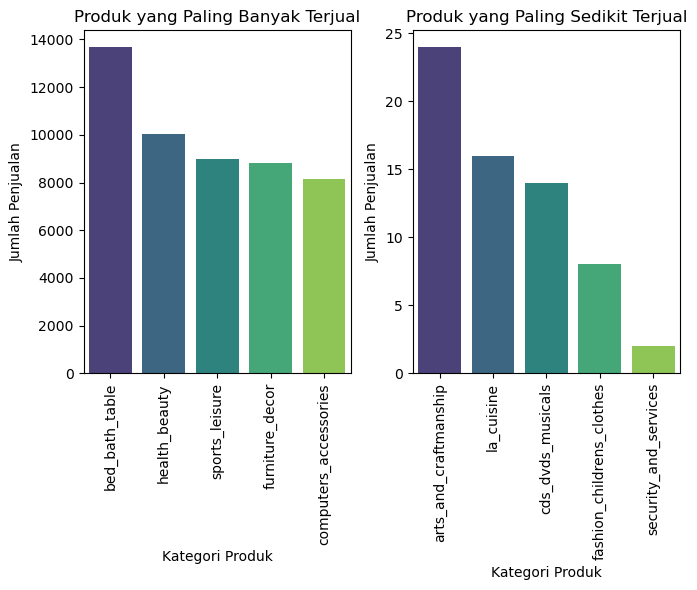

   product_category_name_english  count
7                 bed_bath_table  13697
43                 health_beauty  10032
65                sports_leisure   9004
39               furniture_decor   8832
15         computers_accessories   8150
   product_category_name_english  count
3          arts_and_craftmanship     24
52                    la_cuisine     16
11             cds_dvds_musicals     14
29     fashion_childrens_clothes      8
61         security_and_services      2


In [181]:
# Membuat dua buah visualisasi dalam satu gambar
fig, axes = plt.subplots(1, 2, figsize=(7, 6))

# Hitung jumlah penjualan untuk setiap produk
produk_terjual = all_df.groupby('product_category_name_english').size().reset_index(name='count')

# Urutkan berdasarkan jumlah penjualan
produk_terjual = produk_terjual.sort_values(by='count', ascending=False)

# Visualisasi produk yang paling banyak terjual
sns.barplot(x='product_category_name_english', y='count', data=produk_terjual.head(), ax=axes[0], palette='viridis')
axes[0].set_title('Produk yang Paling Banyak Terjual')
axes[0].set_xlabel('Kategori Produk')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Jumlah Penjualan')

# Visualisasi produk yang paling sedikit terjual
sns.barplot(x='product_category_name_english', y='count', data=produk_terjual.tail(), ax=axes[1], palette='viridis')
axes[1].set_title('Produk yang Paling Sedikit Terjual')
axes[1].set_xlabel('Kategori Produk')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Jumlah Penjualan')

plt.tight_layout()
plt.show()

# Menampilkan data 
print(produk_terjual.head()) 
print(produk_terjual.tail())


**Insight :**

1. Visualisasi ini menunjukkan kategori produk **bed_bath_table muncul sebagai kategori dengan penjualan tertinggi**, ini menunjukkan bahwa produk-produk dalam kategori ini sangat populer dan memiliki permintaan yang tinggi.
2. Sedangkan kategori **security_and_services muncul sebagai kategori dengan penjualan terendah**, ini menunjukkan bahwa produk-produk dalam kategori ini kurang populer dan memiliki permintaan yang rendah.

**Pertanyaan 2 : Berapa banyak revenue yang didapat dalam 6 bulan terakhir dan sepanjang periode ?**

**2.1. Revenue yang didapat dalam 6 bulan terakhir**

  order_purchase_timestamp  payment_value
0                  2018-03     1366493.00
1                  2018-04     1499340.70
2                  2018-05     1505826.18
3                  2018-06     1298592.17
4                  2018-07     1353053.32
5                  2018-08     1227553.99
6                  2018-09         166.46


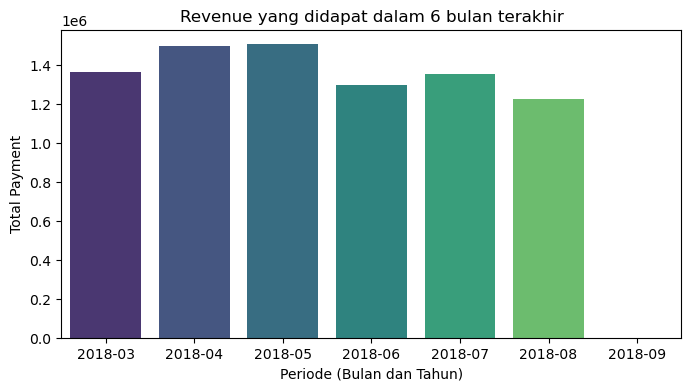

In [182]:
# Tentukan tanggal maksimal dan hitung tanggal 6 bulan sebelumnya
tanggal_maksimal = all_df['order_purchase_timestamp'].max()
tanggal_6_bulan_sebelumnya = tanggal_maksimal - pd.DateOffset(months=6)

# Filter data untuk 6 bulan terakhir
recent_payments = all_df[all_df['order_purchase_timestamp'] >= tanggal_6_bulan_sebelumnya]

# Hitung total uang yang dihabiskan pelanggan berdasarkan bulan
total_spent_per_month = recent_payments.groupby(recent_payments['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum().reset_index()
print(total_spent_per_month)

# Buat visualisasi
plt.figure(figsize=(8, 4))
sns.barplot(x='order_purchase_timestamp', y='payment_value', data=total_spent_per_month, palette='viridis')
plt.title('Revenue yang didapat dalam 6 bulan terakhir')
plt.xlabel('Periode (Bulan dan Tahun)')
plt.ylabel('Total Payment')
plt.xticks(rotation=0)
plt.show()


**Insight :**

Dari visualisasi tersebut, kita bisa menyimpulkan bahwa pada bulan **Mei 2018**, total uang yang dihabiskan oleh pelanggan mencapai puncaknya dibandingkan dengan bulan-bulan lainnya dalam periode 6 bulan terakhir. Kemungkinan alasan untuk peningkatan ini bisa dikeranakan adanya promosi/diskon, musim liburan, atau adanya peluncuran produk baru. 

**2.2. Revenue yang didapat sepanjang periode**

   order_purchase_period  payment_value
0                2016-09         347.52
1                2016-10       74353.46
2                2016-12          19.62
3                2017-01      189570.02
4                2017-02      346280.99
5                2017-03      529993.27
6                2017-04      506610.77
7                2017-05      730774.62
8                2017-06      605483.12
9                2017-07      741936.39
10               2017-08      878027.04
11               2017-09     1022896.05
12               2017-10     1035728.78
13               2017-11     1595006.04
14               2017-12     1046223.15
15               2018-01     1418478.51
16               2018-02     1321846.20
17               2018-03     1482224.09
18               2018-04     1499340.70
19               2018-05     1505826.18
20               2018-06     1298592.17
21               2018-07     1353053.32
22               2018-08     1227553.99
23               2018-09         166.46


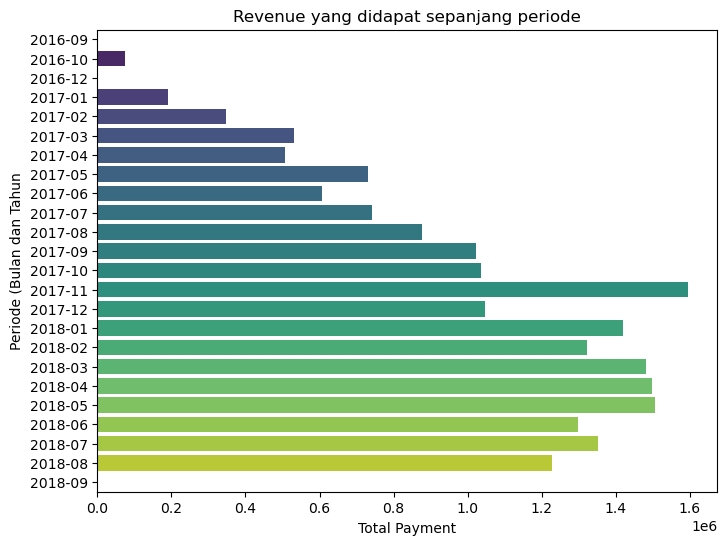

In [183]:
# Pastikan kolom tanggal dalam format datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Konversi menjadi periode bulan dan tahun
all_df['order_purchase_period'] = all_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung total uang yang dihabiskan pelanggan berdasarkan periode
total_spent_per_period = all_df.groupby('order_purchase_period')['payment_value'].sum().reset_index()
print(total_spent_per_period)

# Buat visualisasi barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='payment_value', y='order_purchase_period', data=total_spent_per_period, palette='viridis')
plt.title('Revenue yang didapat sepanjang periode')
plt.xlabel('Total Payment')
plt.ylabel('Periode (Bulan dan Tahun')
plt.xticks(rotation=0)
plt.show()


**Insight :**

1. Terdapat fluktuasi pendapatan yang signifikan sepanjang periode. Misalnya, pengeluaran pada **bulan November 2017 adalah 1,595,006.04**, yang kemudian **menurun pada bulan Desember 2017 menjadi 1,046,223.15**. Fluktuasi ini bisa disebabkan oleh berbagai faktor, termasuk musim liburan atau perubahan dalam strategi pemasaran.
2. Bulan dengan **pendapatan tertinggi adalah November 2017, dengan total pendapatan 1,595,006.04**. Ini menunjukkan bahwa ada faktor-faktor tertentu yang mendorong peningkatan belanja pada bulan tersebut, seperti promosi, diskon, atau acara khusus.
3. Bulan dengan **pendapatan terendah adalah Desember 2016, dengan total pendapatan hanya 19.62**. Ini mungkin menunjukkan bahwa ada faktor lain yang menyebabkan rendahnya pendapatan pada bulan tersebut.

### Teknik Analisis Lanjutan

**RFM Analysis (Recency, Frequency, Monetary)**

- **Distribution of Recency, Frequency, Monetary**

In [184]:
# Pastikan kolom tanggal dalam format datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Hitung nilai Recency, Frequency, dan Monetary  
current_date = all_df['order_purchase_timestamp'].max()
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

rfm_df = all_df.groupby('customer_id').agg({ 
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days, 
    'order_id': 'count', 
    'payment_value': 'sum' 
}).reset_index() 

rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary'] 

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


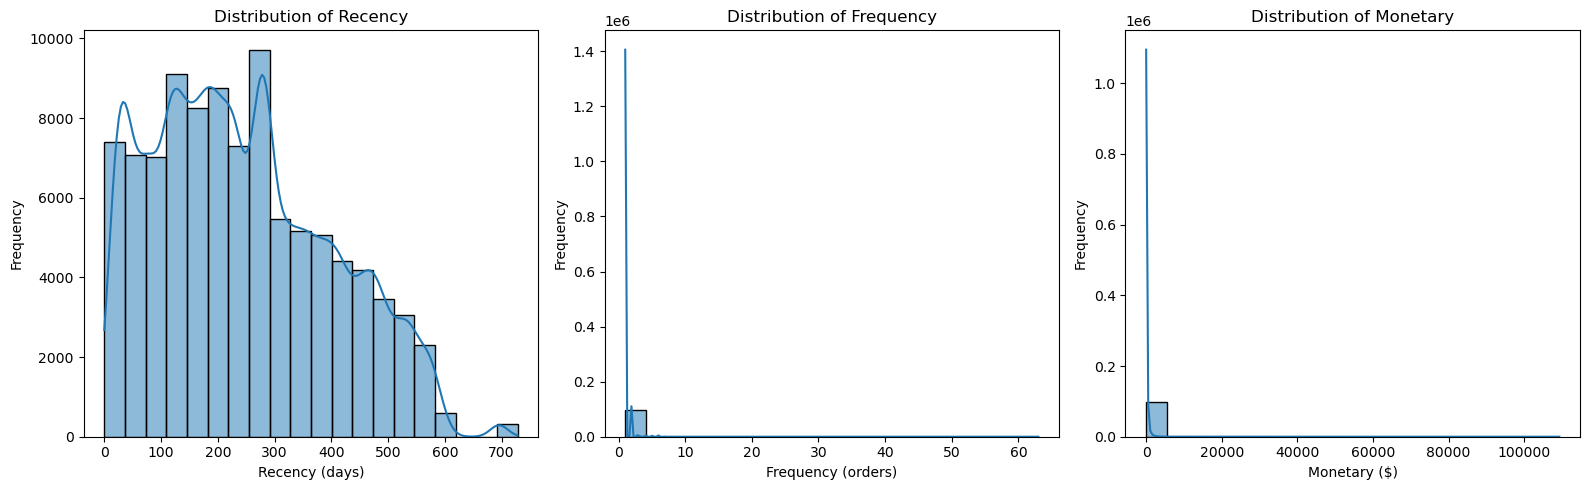

In [185]:
# Visualisasi Recency, Frequency, dan Monetary
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Visualisasi Recency
sns.histplot(rfm_df['Recency'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Frequency')

# Visualisasi Frequency
sns.histplot(rfm_df['Frequency'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency (orders)')
axes[1].set_ylabel('Frequency')

# Visualisasi Monetary
sns.histplot(rfm_df['Monetary'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Monetary')
axes[2].set_xlabel('Monetary ($)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Average Recency, Frequency, and Monetary Values**

Average Recency: 244.84 days
Average Frequency: 1.2 orders
Average Monetary: $206.91


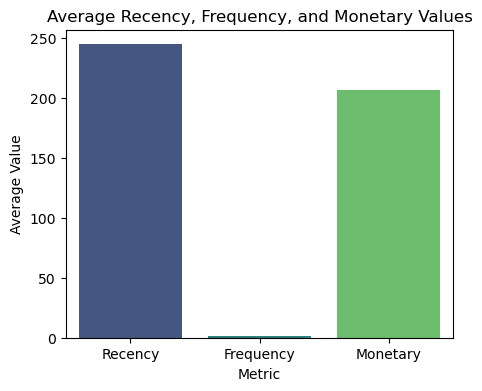

In [186]:
# Hitung rata-rata Recency, Frequency, dan Monetary 
average_recency = round(rfm_df['Recency'].mean(), 2) 
average_frequency = round(rfm_df['Frequency'].mean(), 2) 
average_monetary = round(rfm_df['Monetary'].mean(), 2) 

# Tampilkan hasil 
print(f"Average Recency: {average_recency} days") 
print(f"Average Frequency: {average_frequency} orders") 
print(f"Average Monetary: ${average_monetary:,.2f}")

# Visualisasi nilai rata-rata Recency, Frequency, dan Monetary
average_values = pd.DataFrame({
    'Metric': ['Recency', 'Frequency', 'Monetary'],
    'Average Value': [average_recency, average_frequency, average_monetary]
})

plt.figure(figsize=(5, 4))
sns.barplot(x='Metric', y='Average Value', data=average_values, palette='viridis')
plt.title('Average Recency, Frequency, and Monetary Values')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.show()


**Clustering**

- **Metode Manual Grouping : kategori pelanggan berdasarkan rentang nilai Monetary**

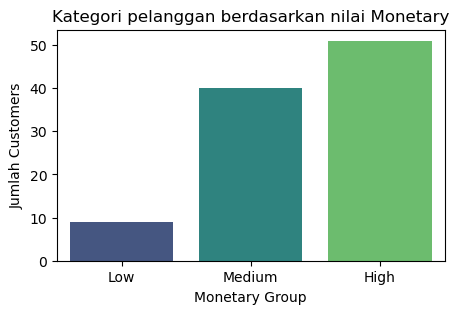

In [187]:
# Contoh data RFM
data = {
    'customer_id': range(1, 101),
    'Recency': [i % 30 for i in range(1, 101)],
    'Frequency': [i % 10 for i in range(1, 101)],
    'Monetary': [i * 100 for i in range(1, 101)]
}

rfm_df = pd.DataFrame(data)

# Manual Grouping berdasarkan nilai Monetary
def manual_grouping(monetary):
    if monetary < 1000:
        return 'Low'
    elif 1000 <= monetary < 5000:
        return 'Medium'
    else:
        return 'High'

rfm_df['Monetary_Group'] = rfm_df['Monetary'].apply(manual_grouping)

# Visualisasi Manual Grouping
plt.figure(figsize=(5, 3))
sns.countplot(x='Monetary_Group', data=rfm_df, palette='viridis')
plt.title('Kategori pelanggan berdasarkan nilai Monetary')
plt.xlabel('Monetary Group')
plt.ylabel('Jumlah Customers')
plt.show()


- **Metode Binning : membagi nilai Recency ke dalam beberapa interval/kategori.**

D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


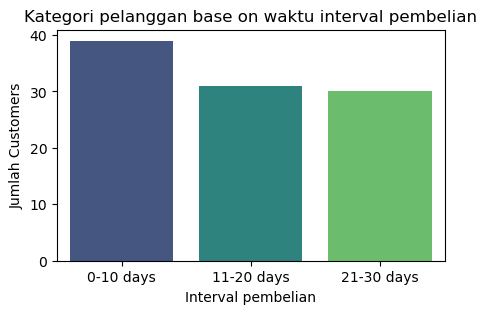

In [188]:
# Binning berdasarkan nilai Recency
bins = [0, 10, 20, 30]
labels = ['0-10 days', '11-20 days', '21-30 days']
rfm_df['Recency_Bin'] = pd.cut(rfm_df['Recency'], bins=bins, labels=labels, right=False)

# Visualisasi Binning
plt.figure(figsize=(5, 3))
sns.countplot(x='Recency_Bin', data=rfm_df, palette='viridis')
plt.title('Kategori pelanggan base on waktu interval pembelian')
plt.xlabel('Interval pembelian')
plt.ylabel('Jumlah Customers')
plt.show()


### Conclusion

**Conclution pertanyaan 1 : Produk apa yang paling banyak dan paling sedikit terjual ?**

**1. Produk yang Paling Banyak Terjual :**

**Kategori Produk :** Produk dalam kategori bed_bath_table adalah yang paling banyak terjual.

**Jumlah Penjualan :** Kategori ini memiliki jumlah penjualan tertinggi dengan total 13,521 produk terjual.

**Insight :** Produk dalam kategori ini sangat populer di kalangan pelanggan, menunjukkan permintaan yang tinggi dan preferensi pelanggan terhadap produk-produk dalam kategori ini. Ini bisa menjadi fokus utama dalam strategi pemasaran dan pengelolaan stok untuk memastikan ketersediaan produk yang tinggi permintaannya.

**2. Produk yang Paling Sedikit Terjual :**

**Kategori Produk :** Produk dalam kategori security_and_services adalah yang paling sedikit terjual.

**Jumlah Penjualan :** Kategori ini memiliki jumlah penjualan terendah dengan total 2 produk terjual.

**Insight :** Produk dalam kategori ini kurang diminati oleh pelanggan, menunjukkan permintaan yang rendah. Ini bisa menjadi area yang memerlukan evaluasi lebih lanjut untuk menentukan apakah produk-produk dalam kategori ini perlu diperbaiki, dihapus, atau diganti dengan produk lain yang lebih diminati. Strategi diskon atau promosi khusus juga bisa dipertimbangkan untuk meningkatkan penjualan produk dalam kategori ini.

**Conclution pertanyaan 2 : Berapa banyak revenue yang didapat dalam 6 bulan terakhir dan sepanjang periode ?**

**1. Revenue yang didapat dalam 6 bulan terakhir :**

**Periode :** Maret 2018 hingga September 2018.

**Insight :** Pengeluaran pelanggan mencapai puncaknya pada bulan Mei 2018 dengan total pengeluaran sebesar Rp 1,504,928.43. Ini menunjukkan bahwa ada faktor-faktor tertentu yang mendorong peningkatan belanja pada bulan tersebut, seperti promosi, diskon, atau acara khusus. Pengeluaran pelanggan pada bulan September 2018 sangat rendah, hanya sebesar Rp 166.46. Ini mungkin menunjukkan bahwa ada faktor-faktor tertentu yang menyebabkan penurunan drastis dalam pengeluaran. 

**2. Revenue yang didapat sepanjang periode :**

**Periode :** September 2016 hingga September 2018.

**Insight :** Pengeluaran pelanggan menunjukkan tren peningkatan yang konsisten dari waktu ke waktu, dengan beberapa fluktuasi. Puncak pengeluaran terjadi pada bulan November 2017 sebesar Rp 1,583,869.01 dan pada bulan Mei 2018 sebesar Rp 1,504,928.43. Fluktuasi ini bisa disebabkan oleh berbagai faktor, termasuk musim liburan, promosi, atau perubahan dalam strategi pemasaran.